# 1. 이커머스 데이터 분석

*** 
**사용데이터**
- [Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/olistbr/brazilian-ecommerce)

***
**Olist**
- 홈페이지: https://olist.com/

- [데이터베이스 스키마](https://ko.wikipedia.org/wiki/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4_%EC%8A%A4%ED%82%A4%EB%A7%88)

**Data Schema**
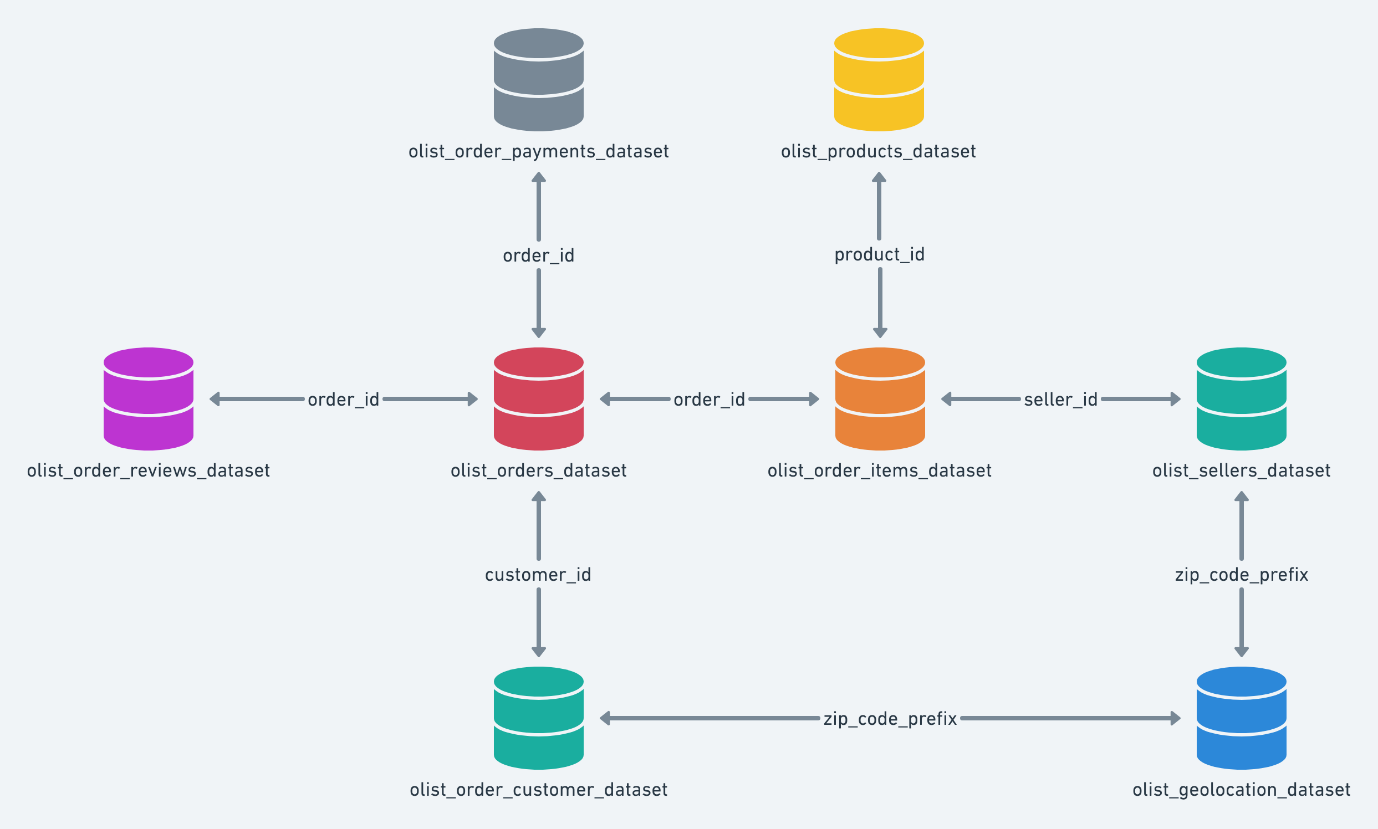

***
## **학습목표**  
1. 이커머스 데이터를 이해해봅니다. 이를 위해, 데이터셋을 원하는 형태로 바꾸고, 적합한 시각화를 진행해봅니다.
2. 데이터 핸들링 시, 엑셀의 기능과 비교해서 이해해봅니다.
3. (참고) 자료를 확인하며 개념과 기능을 숙지해봅니다.

***
## **파이썬 라이브러리 로드**

In [1]:
# 추가 라이브러리 설치
# 아래의 버전에 의존성이 있습니다. 
# !pip install missingno==0.4.2
# !pip install squarify==0.4.3

In [2]:
# 파이썬의 기초를 이해하는 단계이므로, 경고 메세지는 확인하지 않습니다.

import warnings
warnings.filterwarnings('ignore')

In [3]:
# 라이브러리 import

import pandas as pd
import numpy as np

In [4]:
# 시각화 라이브러리 import

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify #treemap

***
**(참고) matplotlib 한글폰트 사용하기**
- http://corazzon.github.io/matplotlib_font_setting

In [5]:
# 노트북 전체 폰트 설정

plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (12,8)

In [6]:
print('설정 되어있는 폰트 사이즈 : {}'.format(plt.rcParams['font.size']))
print('설정 되어있는 폰트 글꼴 : {}'.format(plt.rcParams['font.family']))
print('설정 되어있는 차트 크기 : {}'.format(plt.rcParams["figure.figsize"]))

설정 되어있는 폰트 사이즈 : 14.0
설정 되어있는 폰트 글꼴 : ['NanumBarunGothic']
설정 되어있는 차트 크기 : [12.0, 8.0]


In [7]:
# matplotlib에서 마이너스 부호가 깨질 때

mpl.rcParams['axes.unicode_minus'] = False

***
## **데이터 로드**

In [8]:
# 경로
dir = 'D:/Task/08.fastcampus/project/01.Olist_ecommerce_data_analysis/data/'

In [9]:
# data load 1
# 먼저, 주문테이블 하나를 불러옵니다.

df_order = pd.read_csv(dir + 'brazilian-ecommerce/olist_orders_dataset.csv')
# df_order_item = pd.read_csv(dir + 'brazilian-ecommerce/olist_order_items_dataset.csv')
# df_order_pay = pd.read_csv(dir + 'brazilian-ecommerce/olist_order_payments_dataset.csv')
# df_order_review = pd.read_csv(dir + 'brazilian-ecommerce/olist_order_reviews_dataset.csv')
# df_cust = pd.read_csv(dir + 'brazilian-ecommerce/olist_customers_dataset.csv')
# df_geo = pd.read_csv(dir + 'brazilian-ecommerce/olist_geolocation_dataset.csv')
# df_product = pd.read_csv(dir + 'brazilian-ecommerce/olist_products_dataset.csv')
# df_seller = pd.read_csv(dir + 'brazilian-ecommerce/olist_sellers_dataset.csv')
# df_category = pd.read_csv(dir + 'brazilian-ecommerce/product_category_name_translation.csv')

In [10]:
# 데이터셋 형태
df_order.shape

(99441, 8)

In [11]:
# olist_orders_dataset
df_order.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [12]:
# olist_orders_dataset
df_order.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
36831,72d962900f248fa642ba065e45756455,79d079b8c2de5835e7979c910bfc880d,delivered,2017-03-29 14:23:48,2017-03-30 06:42:11,2017-03-31 12:01:44,2017-04-11 11:17:50,2017-04-20 00:00:00
42136,ba4088023bb3056caca3d40810844bf6,74caf64e68fcb4dcf49a9e3b1766922f,delivered,2018-06-28 18:13:35,2018-06-28 18:32:17,2018-07-03 13:44:00,2018-07-10 13:32:59,2018-07-30 00:00:00
71503,5adbe48c338c130733d09677efb8c0df,d8ff2b62871d3aba6e62517b01e4871e,delivered,2017-04-18 20:49:50,2017-04-20 02:55:26,2017-04-28 14:44:58,2017-05-12 15:15:43,2017-05-24 00:00:00


In [13]:
# 칼럼 별 데이터 형태 및 null 수 확인하기
# 데이터 타입을 변경이 필요한 칼럼들을 찾습니다.

df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [14]:
# 데이터타입 확인하기
df_order.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

***
**(참고)**  
- [데이터타입 변경 : to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

In [15]:
df_order['order_purchase_timestamp'] = pd.to_datetime(df_order['order_purchase_timestamp'])
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


***
**=> 이렇게 데이터를 로드하고 바꿔줄 수도 있지만, 처음 로드를 할 때부터 바꿔줄 수도 있습니다.**

**(참고)**
- [pandas의 read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [16]:
# data load 2

df_order = pd.read_csv(dir + 'brazilian-ecommerce/olist_orders_dataset.csv',
                      parse_dates=['order_purchase_timestamp',
                                    'order_approved_at',
                                    'order_delivered_carrier_date',
                                    'order_delivered_customer_date',
                                    'order_estimated_delivery_date'
                                   ])
                                   
df_order_item = pd.read_csv(dir + 'brazilian-ecommerce/olist_order_items_dataset.csv',
                           parse_dates=['shipping_limit_date'])

df_order_review = pd.read_csv(dir + 'brazilian-ecommerce/olist_order_reviews_dataset.csv',
                             parse_dates=['review_creation_date','review_answer_timestamp'])

df_order_pay = pd.read_csv(dir + 'brazilian-ecommerce/olist_order_payments_dataset.csv')
df_cust = pd.read_csv(dir + 'brazilian-ecommerce/olist_customers_dataset.csv')
df_product = pd.read_csv(dir + 'brazilian-ecommerce/olist_products_dataset.csv')
df_seller = pd.read_csv(dir + 'brazilian-ecommerce/olist_sellers_dataset.csv')
df_category = pd.read_csv(dir + 'brazilian-ecommerce/product_category_name_translation.csv')
df_geo = pd.read_csv(dir + 'brazilian-ecommerce/olist_geolocation_dataset.csv')

In [195]:
# data type 확인

df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


***
## **데이터 탐색**

***
**(참고)**  
- [파이썬 입력과 출력](https://docs.python.org/ko/3/tutorial/inputoutput.html)


In [18]:
print("df_cust shape: {}".format(df_cust.shape))
print("df_geo shape: {}".format(df_geo.shape))
print("df_order_item shape: {}".format(df_order_item.shape))
print("df_order_pay shape: {}".format(df_order_pay.shape))
print("df_order_review shape: {}".format(df_order_review.shape))
print("df_order shape: {}".format(df_order.shape))
print("df_product shape: {}".format(df_product.shape))
print("df_seller: {}".format(df_seller.shape))
print("df_category: {}".format(df_category.shape))

df_cust shape: (99441, 5)
df_geo shape: (1000163, 5)
df_order_item shape: (112650, 7)
df_order_pay shape: (103886, 5)
df_order_review shape: (100000, 7)
df_order shape: (99441, 8)
df_product shape: (32951, 9)
df_seller: (3095, 4)
df_category: (71, 2)


***
#### **진행순서**  
1. 로드한 테이블을 하나씩 살펴보면서 포함된 데이터를 이해해봅니다.
2. 필요한 데이터 핸들링 및 시각화 작업을 진행합니다.
3. 이를 토대로 의미를 도출해봅니다.

- [Exploratory Data Analysis - EDA](https://ko.wikipedia.org/wiki/%ED%83%90%EC%83%89%EC%A0%81_%EC%9E%90%EB%A3%8C_%EB%B6%84%EC%84%9D)  
- [EDA, 데이터 설명서에서 시작하기](https://medium.com/mighty-data-science-bootcamp/eda-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%84%A4%EB%AA%85%EC%84%9C%EC%97%90%EC%84%9C-%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0-230060b9fc17)

***
### **첫번째로 살펴볼 테이블 : olist_orders_dataset**

In [19]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [20]:
df_order.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [21]:
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [22]:
df_order.tail(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03


In [23]:
# 요약정보

df_order.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,2660e4e0c99dc944d9935e3b8781d81b,8970ed2a42455d59af7ca18d17aa8b8b,delivered,2018-03-31 15:08:21,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [24]:
# shift + tab 키 : 공식문서
# object 타입을 제외한 나머지값을 볼때

df_order.describe(exclude=[np.object])

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
unique,98875,90733,81018,95664,459
top,2018-03-31 15:08:21,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,3,9,47,3,522
first,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


***
**[엑셀에서의 결측치 확인 방법]**
***

In [25]:
# 결측치 확인

df_order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [26]:
2965+1783+160

4908

**(참고)**
- [pandas.DataFrame.any](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html)

In [27]:
# 결측치가 있는 데이터 확인

df_order_null = df_order[df_order.isnull().any(axis=1)] 
df_order_null

# # order_approved_at 칼럼에 null값이 있는 row 출력
# df_order_col1 = df_order[df_order['order_approved_at'].isnull()]
# df_order_col1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


***
**(참고 - 결측치 시각화)**  
소개할 방법은 seaborn과 missingno 라이브러리  
- https://seaborn.pydata.org/generated/seaborn.heatmap.html
- https://github.com/ResidentMario/missingno

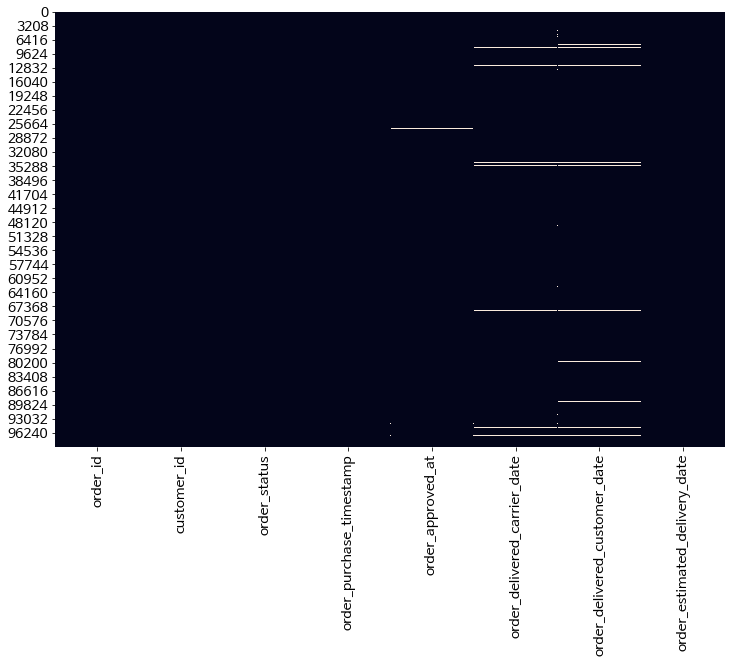

In [28]:
# import seaborn as sns

sns.heatmap(df_order.isnull(), cbar=False)

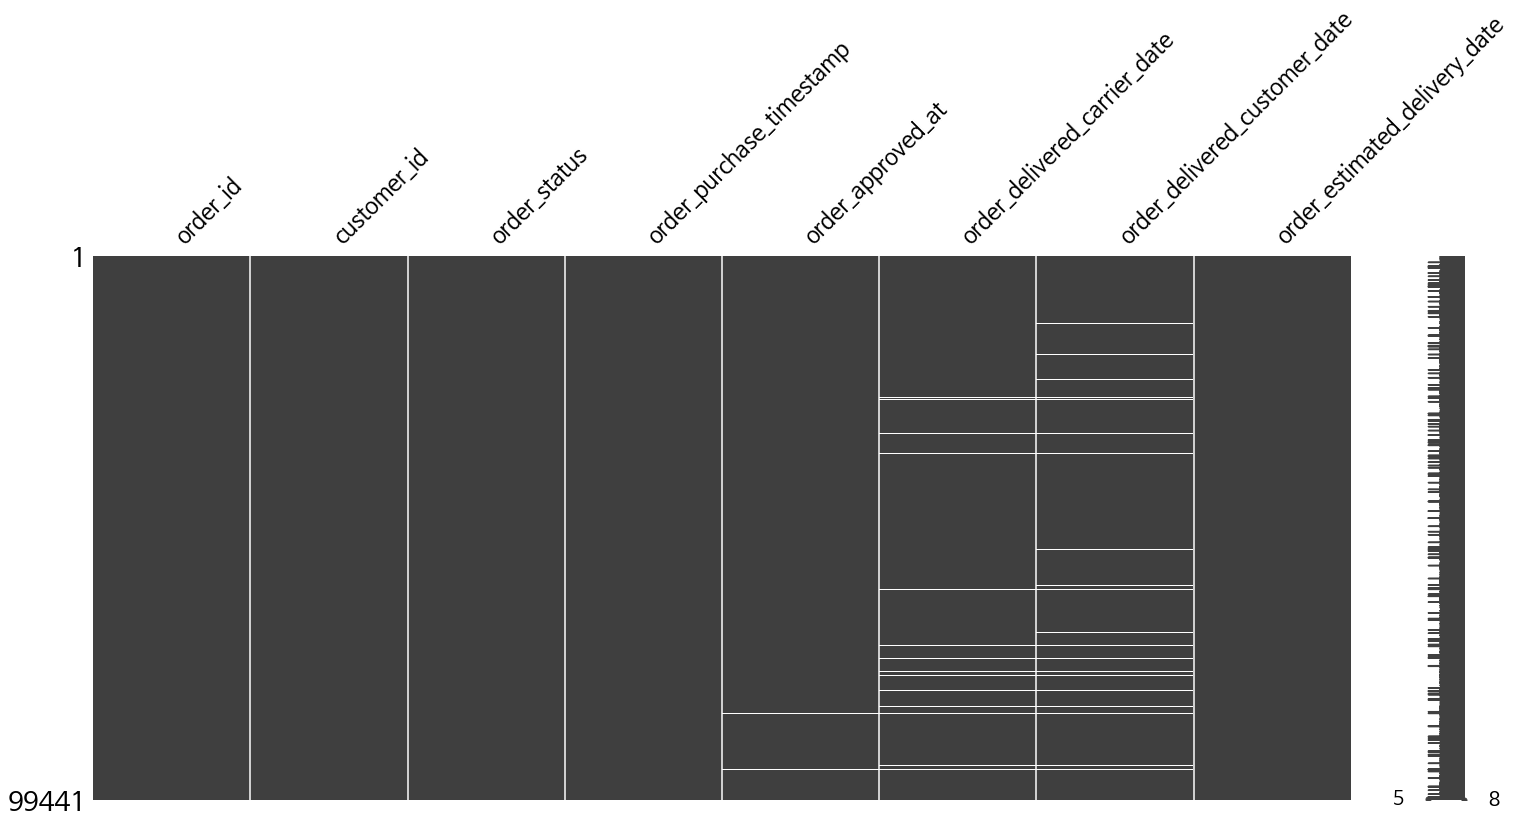

In [29]:
# pip install missingno
# import missingno as msno

msno.matrix(df_order, fontsize=22)

***
#### **결측치 처리하기**  
- 결측치를 처리하는 방법에는 크게 삭제 혹은 특정값으로 채우는 방법이 있습니다.
- 데이터가 많을 경우 데이터를 삭제할 수도 있겠지만, 그렇지 않다면 데이터는 소중하기 때문에 특정값으로 대체하게 됩니다.
- 결측치 처리방법은 아래 링크를 참조해주세요.  
  
**(참고)**
- [pandas의 fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
- [pandas의 dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
- [pandas의 notnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.notnull.html)
- [pandas.DataFrame.any](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html)
- [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/)
- [Handling Missing Data](https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html)  
- [결측치 처리](https://eda-ai-lab.tistory.com/14) 
- [Pandas: Find Rows Where Column/Field Is Null](https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null)

In [30]:
# 결측치가 있으면 제대로된 시각화를 할 수 없기 때문에 drop 합니다.

# 결측치가 있는 row drop 방법1
# df_order_clean = df_order[~df_order.isnull().any(axis=1)]
df_order_clean = df_order.dropna(axis=0) # axis=1이면 칼럼을 기준으로

# df_order_clean.reset_index()

df_order_clean.reset_index(drop=True, inplace=True)
df_order_clean

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
96456,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
96457,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
96458,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
96459,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [31]:
# 주문 상태

df_order_clean['order_status'].unique()

array(['delivered', 'canceled'], dtype=object)

In [32]:
# 어떤 주문 상태가 제일 많을까요?

df_order_clean['order_status'].value_counts()

delivered    96455
canceled         6
Name: order_status, dtype: int64

In [33]:
# null값 주문 상태

df_order_null['order_status'].unique()

array(['invoiced', 'shipped', 'processing', 'unavailable', 'canceled',
       'delivered', 'created', 'approved'], dtype=object)

In [34]:
df_order_null['order_status'].value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: order_status, dtype: int64

**=> 위의 정보들을 볼 때, 고객에게 배송이 완료된 경우에는 취소가 6건 정도지만, 고객에게 결제/배송 진행 도중에 취소된 건수는 619건임을 생각해볼 수 있습니다.**

***
#### **데이터 시각화의 필요성**
- 표 형태의 데이터에는 많은 정보들이 담겨있지만, 한 눈에 보기 어려우며 요약된 정보만으로는 데이터셋의 특징을 정확히 알기 힘듭니다.
- "Anscombe's quartet"은 데이터 시각화의 중요성을 얘기할 때 자주 등장하는 예시로, 요약된 정보 만으로 정확한 데이터를 판단할 수 없음을 보여줍니다.
- 아래의 "Anscombe's quartet" 그래프는 각각이 서로 다른 모양의 그래프를 가졌지만, 4개의 데이터 모두 평균, 표준편차, 상관계수가 같습니다.
- [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [당신도 데이터 시각화를 해야하는 5가지 이유](http://www.bloter.net/archives/329334)

**시각화 라이브러리**  
- [matplotlib](https://matplotlib.org/tutorials/index.html)
- [seaborn](https://seaborn.pydata.org/tutorial.html)
- [plotnine](https://plotnine.readthedocs.io/en/stable/)
- [plotnine gallery](https://plotnine.readthedocs.io/en/stable/gallery.html)
- [pandas의 visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
- [python graph gallery](https://python-graph-gallery.com/)

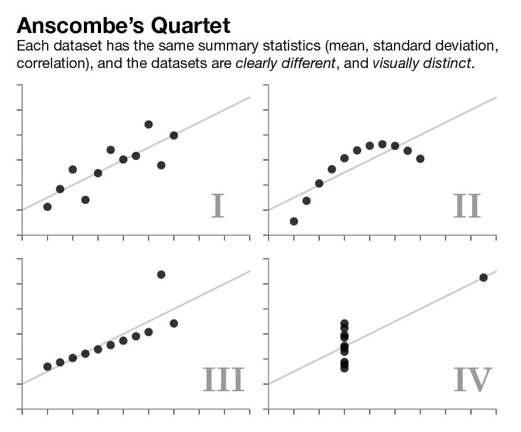

**(참고)**
- [indexing and selecting data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)

In [35]:
# 취소된 건에 대한 차트 비교를 위해 알맞은 데이터 형태로 바꿔줍니다.

A = df_order_clean[df_order_clean['order_status']=='canceled'].shape[0]
B = df_order_null[df_order_null['order_status']=='canceled'].shape[0]

temp = pd.DataFrame(columns=['del_finished', 'del_not_finished'],
                   index=['cancel_cnt'])
temp.loc['cancel_cnt', 'del_finished'] = A
temp.loc['cancel_cnt', 'del_not_finished'] = B
temp

,del_finished,del_not_finished
cancel_cnt,6,619


**(참고)**
- [pandas의 transpose](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html)

In [36]:
# x가 order_status, y가 cnt

temp.T

,cancel_cnt
del_finished,6
del_not_finished,619


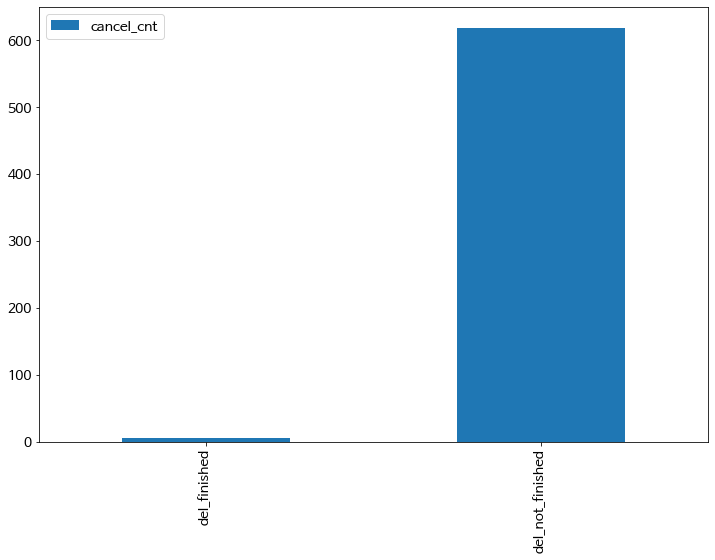

In [37]:
# 취소된 건에 대한 차트 비교

temp.T.plot(kind='bar')

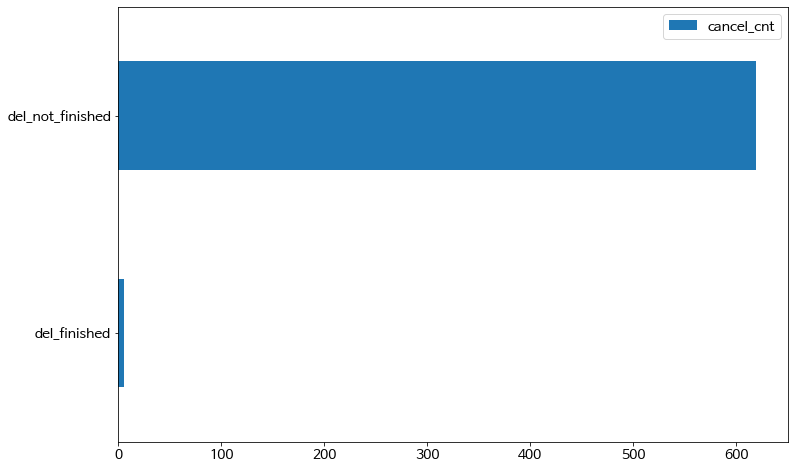

In [38]:
# 세로

temp.T.plot(kind='barh')

In [39]:
# 요약 정보

df_order_clean.describe(exclude=[np.object])

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461
unique,95939,88272,80100,95649,445
top,2018-07-28 13:11:22,2018-02-27 04:31:10,2018-05-09 15:48:00,2017-12-02 00:26:45,2017-12-20 00:00:00
freq,3,9,47,3,507
first,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
last,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


***
**=> olist_orders_dataset 테이블에 새로운 정보 추가**

- order_purchase_timestamp : 구매 시작 날짜/시간
- order_approved_at : 결제 완료 날짜/시간
- order_delivered_customer_date : 실제 고객한테 배달완료된 날짜/시간
- order_estimated_delivery_date : 시스템에서 고객한테 표시되는 예상배달날짜

- *order_approved_at - order_purchase_timestamp : pay_lead_time(단위: 분)*
- *order_delivered_customer_date - order_approved_at : delivery_lead_time(단위: 일)*
- *order_estimated_delivery_date - order_delivered_customer_date : estimated_date_miss(단위: 일)*
  
[리드 타임](https://ko.wikipedia.org/wiki/%EB%A6%AC%EB%93%9C_%ED%83%80%EC%9E%84)
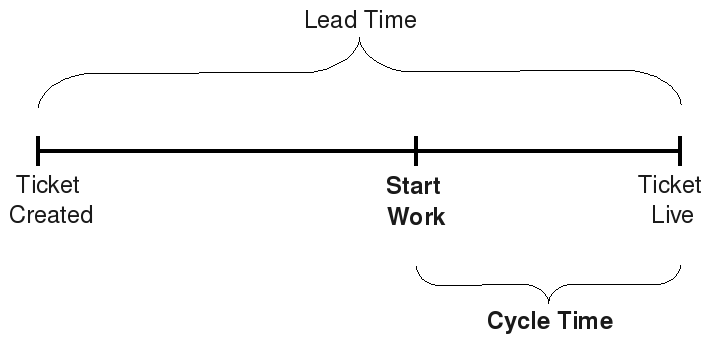

In [40]:
# 결제리드타임

df_order_clean['pay_lead_time'] = df_order_clean['order_approved_at'] - df_order_clean['order_purchase_timestamp']
df_order_clean['pay_lead_time']

0       0 days 00:10:42
1       1 days 06:42:50
2       0 days 00:16:34
3       0 days 00:17:53
4       0 days 01:01:50
              ...      
96456   0 days 00:00:00
96457   0 days 00:11:39
96458   0 days 00:17:33
96459   0 days 00:07:54
96460   0 days 14:22:58
Name: pay_lead_time, Length: 96461, dtype: timedelta64[ns]

**(참고)**
- [pandas의 timedelta](https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html)
- [Datetimes and Timedeltas](http://lagrange.univ-lyon1.fr/docs/numpy/1.11.0/reference/arrays.datetime.html)
- [데이터형태-날짜](https://devanix.tistory.com/306)

In [41]:
# 추후 계산을 용이하게 하기 위해
# 분 단위로 변경

df_order_clean['pay_lead_time_m'] = df_order_clean['pay_lead_time'].astype('timedelta64[m]')
df_order_clean['pay_lead_time_m']

0          10.0
1        1842.0
2          16.0
3          17.0
4          61.0
          ...  
96456       0.0
96457      11.0
96458      17.0
96459       7.0
96460     862.0
Name: pay_lead_time_m, Length: 96461, dtype: float64

In [42]:
# 배달리드타임
# 일 단위

df_order_clean['delivery_lead_time'] = df_order_clean['order_delivered_customer_date'] - df_order_clean['order_approved_at'] 
df_order_clean['delivery_lead_time_D'] = df_order_clean['delivery_lead_time'].astype('timedelta64[D]') 
df_order_clean['delivery_lead_time_D']

0         8.0
1        12.0
2         9.0
3        13.0
4         2.0
         ... 
96456     8.0
96457    22.0
96458    24.0
96459    17.0
96460     7.0
Name: delivery_lead_time_D, Length: 96461, dtype: float64

In [43]:
# 예상날짜 miss
# 일 단위

df_order_clean['estimated_date_miss'] = df_order_clean['order_estimated_delivery_date']\
                            - df_order_clean['order_delivered_customer_date']
df_order_clean['estimated_date_miss_D'] = df_order_clean['estimated_date_miss'].astype('timedelta64[D]')
df_order_clean['estimated_date_miss_D']

0         7.0
1         5.0
2        17.0
3        12.0
4         9.0
         ... 
96456    10.0
96457     1.0
96458     5.0
96459    20.0
96460    17.0
Name: estimated_date_miss_D, Length: 96461, dtype: float64

In [44]:
# 세 칼럼 모두 정수로 바꿔줍니다.

df_order_clean['pay_lead_time_m'] = df_order_clean['pay_lead_time_m'].astype(int)
df_order_clean['delivery_lead_time_D'] = df_order_clean['delivery_lead_time_D'].astype(int)
df_order_clean['estimated_date_miss_D'] = df_order_clean['estimated_date_miss_D'].astype(int)

In [45]:
df_order_clean.dtypes

order_id                                  object
customer_id                               object
order_status                              object
order_purchase_timestamp          datetime64[ns]
order_approved_at                 datetime64[ns]
order_delivered_carrier_date      datetime64[ns]
order_delivered_customer_date     datetime64[ns]
order_estimated_delivery_date     datetime64[ns]
pay_lead_time                    timedelta64[ns]
pay_lead_time_m                            int32
delivery_lead_time               timedelta64[ns]
delivery_lead_time_D                       int32
estimated_date_miss              timedelta64[ns]
estimated_date_miss_D                      int32
dtype: object

In [46]:
df_order_clean.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,pay_lead_time,pay_lead_time_m,delivery_lead_time,delivery_lead_time_D,estimated_date_miss,estimated_date_miss_D
46370,53a0b865b63b4a2b64f8f46b31cdf3ed,8b19bece4c92821ce2ee66e4258d8d92,delivered,2017-04-24 21:04:17,2017-04-24 21:15:13,2017-04-25 11:34:55,2017-05-02 13:19:05,2017-05-15,00:10:56,10,7 days 16:03:52,7,12 days 10:40:55,12
40758,4125f12333bad3b4866e6145396cf2b1,9861537e091dfc7425658421be802bc3,delivered,2017-11-28 15:54:45,2017-11-28 16:17:40,2017-11-29 16:12:59,2017-12-20 00:42:36,2017-12-18,00:22:55,22,21 days 08:24:56,21,-3 days +23:17:24,-3
32740,f8d4190f8951914e3d79e7b6b7871470,e2e3404315182f704a25f3e4f4c45109,delivered,2018-07-19 19:22:05,2018-07-19 19:35:25,2018-07-23 15:39:00,2018-07-25 18:07:15,2018-07-27,00:13:20,13,5 days 22:31:50,5,1 days 05:52:45,1


**=> 새로 만들어준 칼럼들의 분포를 살펴보면**
- [히스토그램](https://ko.wikipedia.org/wiki/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8)
- [seaborn의 히스토그램](https://seaborn.pydata.org/tutorial/distributions.html)
- [히스토그램 주요 결과 해석](https://support.minitab.com/ko-kr/minitab/18/help-and-how-to/graphs/how-to/histogram/interpret-the-results/key-results/)
- [Skewed Distribution](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/)

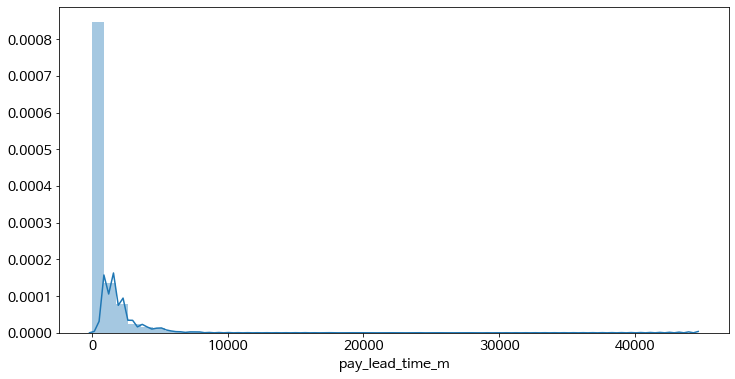

In [47]:
# pay_lead_time(분)

# 출력되는 figure 사이즈 설정
plt.figure(figsize=(12,6))
sns.distplot(df_order_clean['pay_lead_time_m'])

**=> pay_lead_time 의 경우, 오른쪽으로 치우친 형태를 띄고 있는 것으로 볼 때, 다소 큰 양(+)의 값들이 포진해있다고 생각해볼 수 있습니다.**

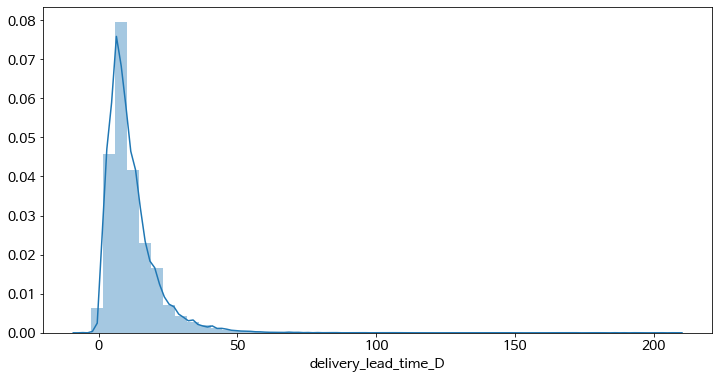

In [48]:
# delivery_lead_time

plt.figure(figsize=(12,6))
sns.distplot(df_order_clean['delivery_lead_time_D'])

**=> delivery_lead_time 의 경우, 오른쪽으로 치우친 형태를 띄고 있는 것으로 볼 때, 다소 큰 양(+)의 값들이 포진해있다고 생각해볼 수 있습니다.**

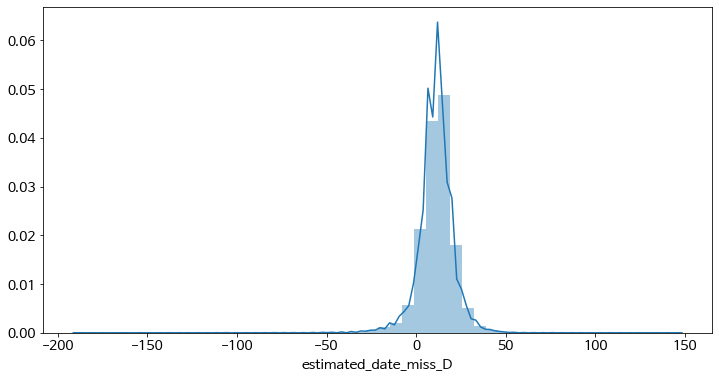

In [49]:
# estimated_date_miss

plt.figure(figsize=(12,6))
sns.distplot(df_order_clean['estimated_date_miss_D'])

**=> estimated_date_miss 의 경우, 양(+)의 값들과 음(-)의 값들 모두 포진해있습니다.**

In [50]:
# 새로 추가한 칼럼들의 요약 정보

df_order_clean[['pay_lead_time_m','delivery_lead_time_D','estimated_date_miss_D']].describe()

,pay_lead_time_m,delivery_lead_time_D,estimated_date_miss_D
count,96461.000000,96461.00000,96461.000000
mean,616.178777,11.64255,10.875577
std,1232.131340,9.51991,10.183476
min,0.000000,-7.00000,-189.000000
25%,12.000000,6.00000,6.000000
50%,20.000000,9.00000,11.000000
75%,871.000000,15.00000,16.000000
max,44486.000000,208.00000,146.000000


**=> pay_lead_time의 경우, 중앙값은 20인데, 평균값은 616이므로 매우 큰 수치의 값들이 함께 있다고 생각할 수 있습니다.**

In [51]:
# 이상한 데이터 확인

# df_order_clean[df_order_clean['pay_lead_time_m']==44486]
# df_order_clean[df_order_clean['delivery_lead_time_D']==208]
# df_order_clean[df_order_clean['estimated_date_miss_D']==146]
df_order_clean[df_order_clean['delivery_lead_time_D']==-7]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,pay_lead_time,pay_lead_time_m,delivery_lead_time,delivery_lead_time_D,estimated_date_miss,estimated_date_miss_D
30282,bc4854efd86d9f42140c951c595d20c1,30aef21b6dd78da1334dd1164cc0b05e,delivered,2017-09-01 20:05:42,2017-09-13 22:00:51,2017-09-04 20:49:57,2017-09-06 22:15:45,2017-09-20,12 days 01:55:09,17395,-7 days +00:14:54,-7,13 days 01:44:15,13


#### **새로운 정보들을 조금 더 살펴보기 위해 boxplot을 그려줍니다.**  
상자수염그림은 데이터의 불균형을 알기 쉽게 표현하는 그래프입니다.
- [상자수염그림 - 위키](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)
- [understanding boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)
- [pandas의 boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html)
- [boxplot - rfriend](https://rfriend.tistory.com/410)
- [boxplot - python gallery](http://python-graph-gallery.com/boxplot/)
- [drawing from data](https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib)

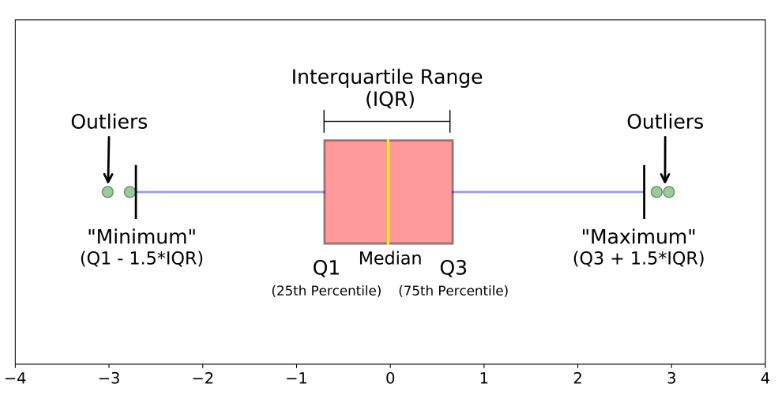

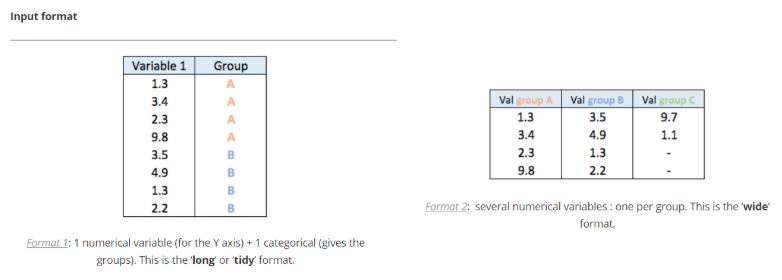

In [52]:
# boxplot을 위한 input format

df_order_time = df_order_clean[['pay_lead_time_m','delivery_lead_time_D','estimated_date_miss_D']]
df_order_time

,pay_lead_time_m,delivery_lead_time_D,estimated_date_miss_D
0,10,8,7
1,1842,12,5
2,16,9,17
3,17,13,12
4,61,2,9
...,...,...,...
96456,0,8,10
96457,11,22,1
96458,17,24,5
96459,7,17,20


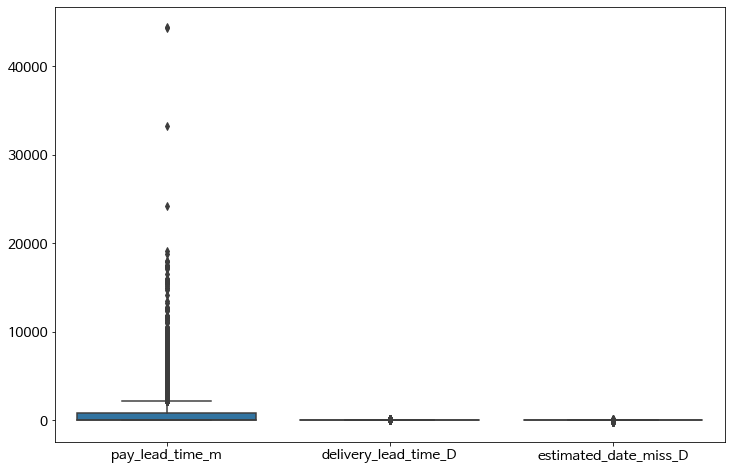

In [53]:
# df_order_time.boxplot(column=['pay_lead_time','delivery_lead_time','estimated_date_miss'], figsize=(12,8))

# 출력되는 figure 사이즈 설정
plt.figure(figsize=(12,8))

sns.boxplot(data=df_order_time)

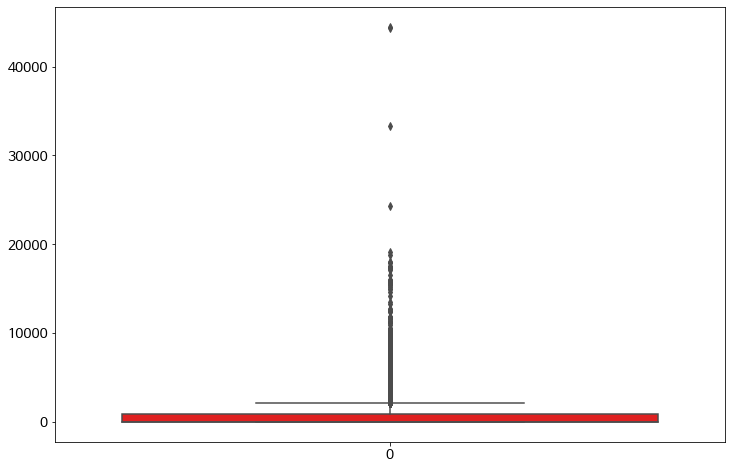

In [54]:
# boxplot - pay_lead_time

# temp.boxplot(column=['pay_lead_time_m'],figsize=(12,8))

plt.figure(figsize=(12,8))
sns.boxplot(data=df_order_time['pay_lead_time_m'], color='red')

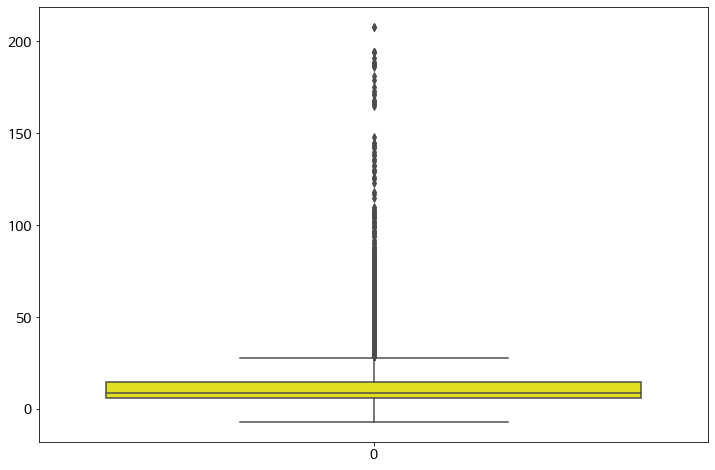

In [55]:
# boxplot - delivery_lead_time

# temp.boxplot(column=['delivery_lead_time_d'],figsize=(12,8))

plt.figure(figsize=(12,8))
sns.boxplot(data=df_order_time['delivery_lead_time_D'], color='yellow')

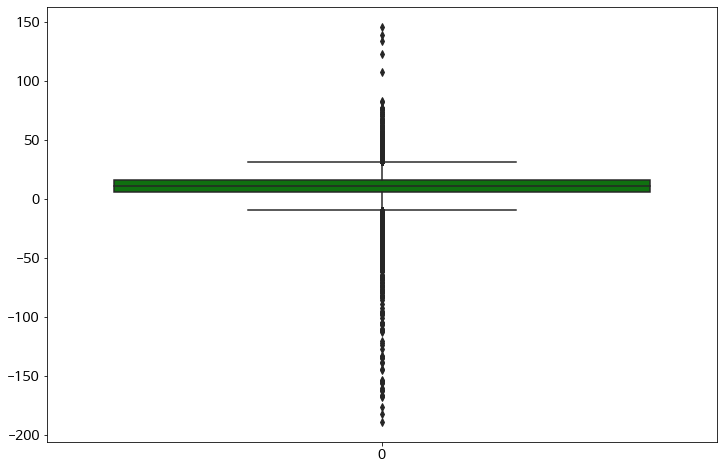

In [56]:
# boxplot - estimated_date_miss

# temp.boxplot(column=['estimated_date_miss_d'],figsize=(12,8))

plt.figure(figsize=(12,8))
sns.boxplot(data=df_order_time['estimated_date_miss_D'], color='green')

**(참고)**
- [Functions](https://www.learnpython.org/en/Functions)
- [함수 정의하기](https://python.bakyeono.net/chapter-3-3.html)
- [사용자 정의 함수 만들기](https://www.codingfactory.net/10034)

In [57]:
# outlier 검출 코드
import numpy as np

def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((data > upper_bound)|(data < lower_bound))

In [58]:
# pay_lead_time 이상치 수

outliers_iqr(df_order_time['pay_lead_time_m'])[0].shape[0]

8915

In [59]:
# delivery_lead_time 이상치 수

outliers_iqr(df_order_time['delivery_lead_time_D'])[0].shape[0]

4772

In [60]:
# estimated_date_miss 이상치 수

outliers_iqr(df_order_time['estimated_date_miss_D'])[0].shape[0]

4300

In [61]:
# 세 칼럼의 이상치 row 인덱스 출력

pay_lead_outlier_index = outliers_iqr(df_order_time['pay_lead_time_m'])[0]
del_lead_outlier_index = outliers_iqr(df_order_time['delivery_lead_time_D'])[0]
est_lead_outlier_index = outliers_iqr(df_order_time['estimated_date_miss_D'])[0]

In [62]:
# 한번 살펴보면

print(type(pay_lead_outlier_index), pay_lead_outlier_index) 
# print(del_lead_outlier_index)
# print(est_lead_outlier_index)

<class 'numpy.ndarray'> [   11    14    29 ... 96412 96413 96427]


In [63]:
# pay_lead_time 이상치에 해당되는 값 출력

df_order_time.loc[pay_lead_outlier_index,'pay_lead_time_m']

11       2466
14       7467
29       2326
31       2878
37       5232
         ... 
96398    5877
96409    4975
96412    2465
96413    2483
96427    7288
Name: pay_lead_time_m, Length: 8915, dtype: int32

In [64]:
# delivery_lead_time 이상치에 해당되는 값 출력

df_order_time.loc[del_lead_outlier_index,'delivery_lead_time_D']

28       30
34       30
40       33
95       36
107      53
         ..
96161    29
96291    41
96304    30
96443    38
96452    37
Name: delivery_lead_time_D, Length: 4772, dtype: int32

In [65]:
# estimated_date_miss 이상치에 해당되는 값 출력

df_order_time.loc[est_lead_outlier_index,'estimated_date_miss_D']

19      -12
24      -10
95      -18
97       34
107     -33
         ..
96336    33
96436    33
96437    66
96443   -22
96454    37
Name: estimated_date_miss_D, Length: 4300, dtype: int32

***
#### **그럼 세 칼럼에 대한 이상치를 제거해보겠습니다.**

**(참고)**
- [numpy concatenate](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

In [66]:
# numpy concat을 통한 array 배열 합치기

lead_outlier_index = np.concatenate((pay_lead_outlier_index, 
                                del_lead_outlier_index, 
                                est_lead_outlier_index
                               ), axis=None)
print(len(lead_outlier_index))
lead_outlier_index

17987


array([   11,    14,    29, ..., 96437, 96443, 96454], dtype=int64)

In [67]:
8915 + 4772 + 4300

17987

**(참고)**
- [for문](https://wikidocs.net/22)
- [리스트 자료형](https://wikidocs.net/14)

In [68]:
# for문을 이용해 

lead_not_outlier_index = []

for i in df_order_time.index:
    
    if i not in lead_outlier_index:
        lead_not_outlier_index.append(i)

print("Done")

Done


In [69]:
lead_not_outlier_index[:20]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 20, 21, 22]

In [70]:
# outlier를 제외한 나머지 row

df_order_time_clean = df_order_time.loc[lead_not_outlier_index]
df_order_time_clean = df_order_time_clean.reset_index(drop=True)
df_order_time_clean

,pay_lead_time_m,delivery_lead_time_D,estimated_date_miss_D
0,10,8,7
1,1842,12,5
2,16,9,17
3,17,13,12
4,61,2,9
...,...,...,...
81500,0,8,10
81501,11,22,1
81502,17,24,5
81503,7,17,20


In [71]:
df_order_time_clean.describe()

,pay_lead_time_m,delivery_lead_time_D,estimated_date_miss_D
count,81505.000000,81505.000000,81505.000000
mean,309.597154,10.164113,11.645641
std,567.404995,6.056576,6.966586
min,0.000000,0.000000,-9.000000
25%,12.000000,6.000000,7.000000
50%,18.000000,9.000000,12.000000
75%,152.000000,14.000000,16.000000
max,2159.000000,28.000000,31.000000


***
### **두번째로 살펴볼 테이블 : olist_customer_dataset**
**=> 그렇다면 이제, 상품을 주문한 고객들은 어떤 고객들인지 확인해봅니다.**

In [72]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [73]:
# 결측치 존재 확인

df_cust.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [74]:
# 고객정보 테이블

df_cust.sample(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
54022,c5380b66e187b0eb17c05d632db8705f,cbebb963325989ab6e95fc1df135ddfc,4085,sao paulo,SP
33253,dd88c0d649b8a0bf6cb4b24d5a4e17d4,e499ded025595ffe76e8b012827e5fbb,72210,brasilia,DF
70956,9b5af827b98640ceb1b528f07e0ea99b,6c452aa2d61947a3231e887a14fd4580,88600,sao joaquim,SC


In [75]:
# 고객이 살고 있는 국가 코드

cust_stat = pd.DataFrame(df_cust['customer_state'].value_counts()).reset_index()
cust_stat.columns = ['states','people_lives']
cust_stat

,states,people_lives
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


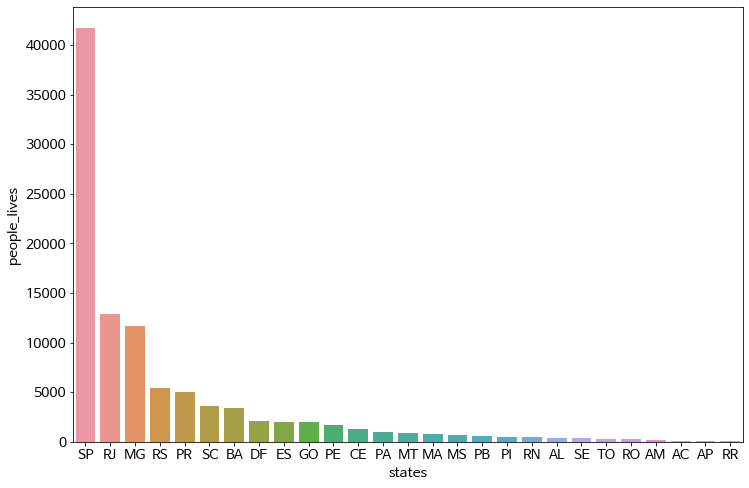

In [76]:
# 국가 코드 별 고객이 살고 있는 수

sns.barplot(x='states', y='people_lives', data=cust_stat)

***
**[엑셀에서 도시별 고객 수와 비율 확인]**
***

In [77]:
# 고객이 살고 있는 도시 이름

# df_cust['customer_city'].value_counts()
df_cust['customer_city'].value_counts(normalize=True)*100 # 퍼센트

sao paulo          15.627357
rio de janeiro      6.920687
belo horizonte      2.788588
brasilia            2.142979
curitiba            1.529550
                     ...    
flores de goias     0.001006
centenario          0.001006
lagoa real          0.001006
messias targino     0.001006
ipecaeta            0.001006
Name: customer_city, Length: 4119, dtype: float64

In [78]:
# 도시별 고객이 살고 있는 비율
# 상위 10개 출력

df_customer_city = pd.DataFrame(df_cust['customer_city'].value_counts(normalize=True)*100).reset_index()
df_customer_city.columns = ['city','people_lives_perc']

df_customer_city.loc[:10,:]

,city,people_lives_perc
0,sao paulo,15.627357
1,rio de janeiro,6.920687
2,belo horizonte,2.788588
3,brasilia,2.142979
4,curitiba,1.529550
5,campinas,1.452117
6,porto alegre,1.386752
7,salvador,1.251999
8,guarulhos,1.195684
9,sao bernardo do campo,0.943273


**(참고)**
- [matplotlib piechart](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)
- [Better visualization of Pie charts by Matplotlib](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f)

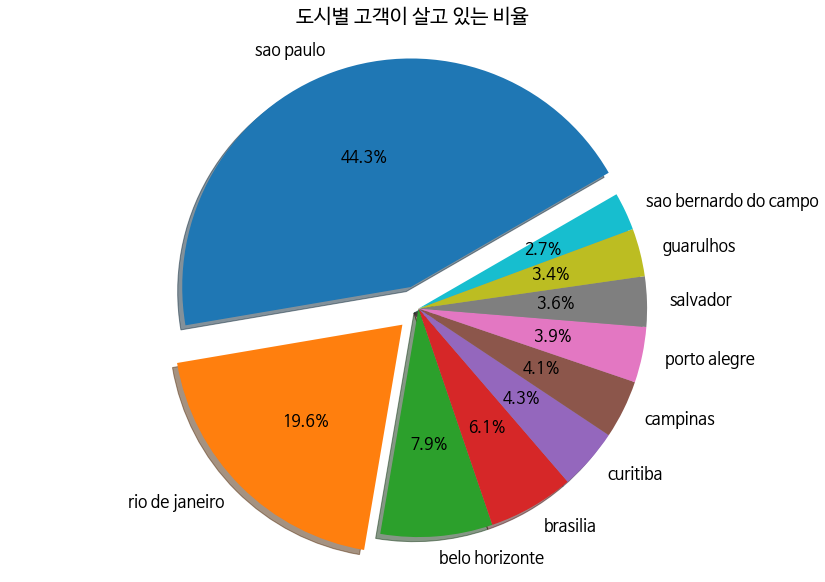

In [79]:
# pie chart
# 거주비율 상위 10개만

labels = df_customer_city['city'].values[:10]
sizes = df_customer_city['people_lives_perc'].values[:10]

explode = (0.1, 0.1, 0, 0, 0,
           0, 0, 0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, 
        explode=explode, 
        autopct='%1.1f%%',
        shadow=True, startangle=30,
       textprops={'fontsize': 16})

ax1.axis('equal')  

plt.tight_layout()
plt.title('도시별 고객이 살고 있는 비율', fontsize=20)
plt.show()

# plt.pie(df_customer_city['people_lives_perc'],labels=df_customer_city['city'], autopct='%.0f%%', shadow=True)

***
### **세번째로 살펴볼 테이블 : olist_order_items_dataset**
**그럼, 다음으로 고객들이 실제 주문한 상품들은 어떤 것인지 확인해봅니다.**

In [80]:
# olist_orders_items_dataset
# 데이터 타입이 올바르게 설정되어있는지 확인해봅니다.

df_order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [81]:
# 결측치 존재 확인

df_order_item.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [82]:
# olist_orders_items_dataset

df_order_item.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


=> **df_order_item 테이블에서 "order_item_id" 칼럼이 가진 뜻이 정확히 어떤 것인지 확인해봅니다.**

**(참고)**  
- [pandas의 group by 공식문서1](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)  
- [pandas의 group by 공식문서2](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
- [pandas의 series.max 공식문서](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.max.html)


In [83]:
# 일단, item_id를 제일 많이 갖고 있는 order_id를 출력해봅니다.

temp = pd.DataFrame(df_order_item.groupby(by=['order_id'])['order_item_id'].count().reset_index())
temp.columns = ['order_id', 'order_item 수']
temp[temp['order_item 수']==temp['order_item 수'].max()]

,order_id,order_item 수
50137,8272b63d03f5f79c56e9e4120aec44ef,21


In [84]:
# order item 숫자가 가장 큰 order_id를 통해 데이터를 확인해봅니다.

df_order_item[df_order_item['order_id']=='8272b63d03f5f79c56e9e4120aec44ef']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


**=> 위 결과로 알 수 있는 점!**
- order_item_id 칼럼의 뜻은 하나의 주문(order_id)에서 구매한 상품들의 수를 뜻합니다. (상품 종류에 상관없이)
- 위 결과의 order_item_id 1번인 상품과 2번, 12번 상품의 price는 1.2로 같지만, 21번 상품은 7.8로 다른 것을 볼 때, price 칼럼은 "상품 단가"를 의미한다고 생각해볼 수 있습니다. (위의 결과에서 총 상품 종류는 3가지)
- 하나의 주문번호에서 "상품별 매출액"을 산출해내기 위해서는 각 상품들의 "구매수량" 칼럼을 추가해주어야 합니다. (상품단가 * 구매수량 = 상품별 매출액)

**이를 원하는 형태로 바꿔줍니다.**
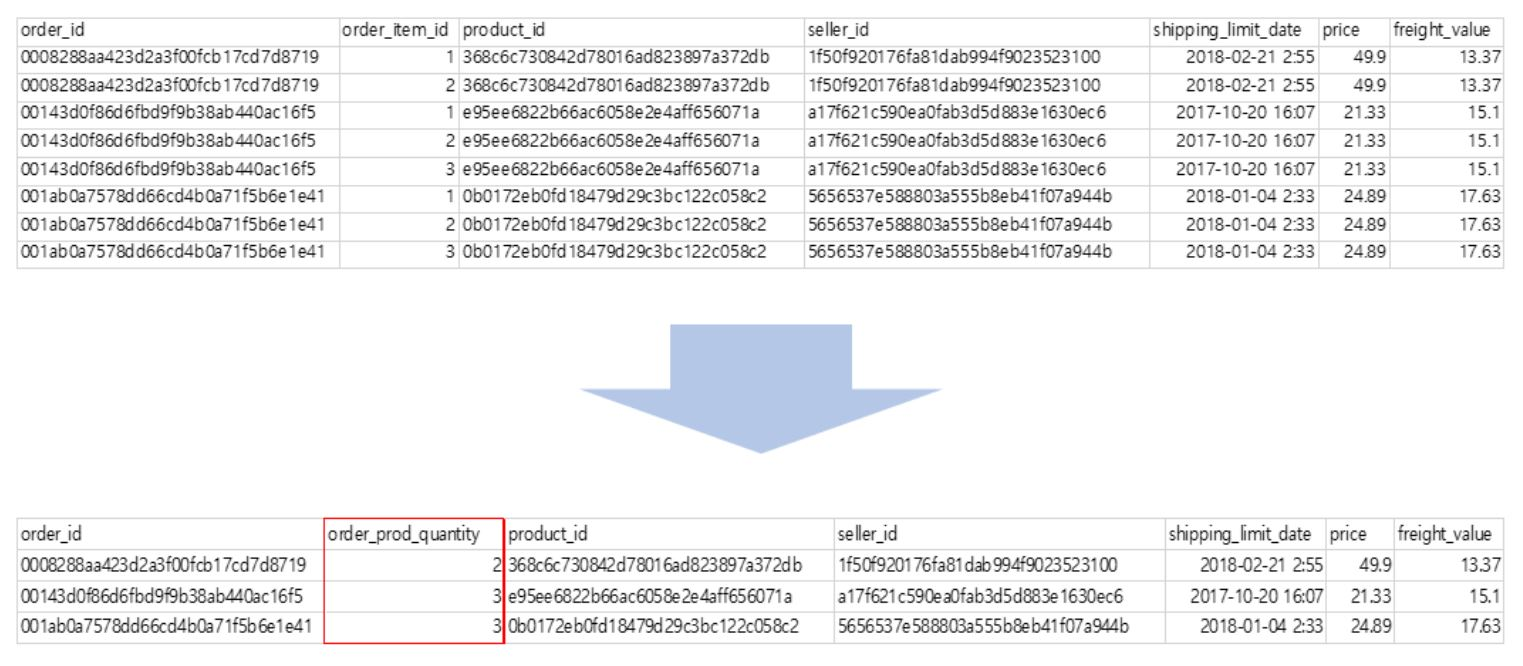

In [85]:
# 주문한 상품 수량 : order_prod_quantity

df_qt = pd.DataFrame(df_order_item.groupby(by=['order_id','product_id'])['order_item_id'].count().reset_index())

# 칼럼명 변경
df_qt.columns = ['order_id','product_id','order_prod_quantity']
df_qt

,order_id,product_id,order_prod_quantity
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1
...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,1
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,1
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,1
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,1


In [86]:
# 맞는지 확인하려면
df_qt[df_qt['order_id']=='8272b63d03f5f79c56e9e4120aec44ef']

,order_id,product_id,order_prod_quantity
52027,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,10
52028,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,10
52029,8272b63d03f5f79c56e9e4120aec44ef,79ce45dbc2ea29b22b5a261bbb7b7ee7,1


**(참고)**
- [두 테이블을 병합하는 방법 : merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [87]:
# 상품 별 주문수량을 추가해주기 위한 merge

# 사용할 order_item 칼럼
df_order_item_col = ['order_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value']

# merge
df_order_item = pd.merge(df_order_item[df_order_item_col], \
                         df_qt, how='inner', on=['order_id','product_id'])

#칼럼 순서 재배치
df_order_item = df_order_item[['order_id','product_id','price','freight_value',\
               'order_prod_quantity','shipping_limit_date','seller_id']]

df_order_item

,order_id,product_id,price,freight_value,order_prod_quantity,shipping_limit_date,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,1,2017-09-19 09:45:35,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,1,2017-05-03 11:05:13,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,1,2018-01-18 14:48:30,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,1,2018-08-15 10:10:18,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,1,2017-02-13 13:57:51,df560393f3a51e74553ab94004ba5c87
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,1,2018-05-02 04:11:01,b8bc237ba3788b23da09c0f1f3a3288c
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,36.53,1,2018-07-20 04:31:48,f3c38ab652836d21de61fb8314b69182
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95,1,2017-10-30 17:14:25,c3cfdc648177fdbbbb35635a37472c53
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72,1,2017-08-21 00:04:32,2b3e4a2a3ea8e01938cabda2a3e5cc79


In [88]:
# 제대로 되었는지 확인해봅니다.

df_order_item[df_order_item['order_id']=='8272b63d03f5f79c56e9e4120aec44ef']

,order_id,product_id,price,freight_value,order_prod_quantity,shipping_limit_date,seller_id
57297,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9
57298,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9
57299,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9
57300,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9
57301,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9
57302,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9
57303,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9
57304,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9
57305,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9
57306,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9


**=> row 중복이 발생하였습니다. 이것은 조인할 때 데이터프레임의 shape을 그대로 가져오기 때문입니다.**

**(참고)**
- [발생된 row 중복 제거 방법 : drop_duplicates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)
- [인덱스 재정렬 : reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)

In [89]:
# 발생된 중복 row를 제거해줍니다.

df_order_item.drop_duplicates(inplace=True)
df_order_item.reset_index(drop=True,inplace=True)
df_order_item

,order_id,product_id,price,freight_value,order_prod_quantity,shipping_limit_date,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,1,2017-09-19 09:45:35,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,1,2017-05-03 11:05:13,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,1,2018-01-18 14:48:30,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,1,2018-08-15 10:10:18,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,1,2017-02-13 13:57:51,df560393f3a51e74553ab94004ba5c87
...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,1,2018-05-02 04:11:01,b8bc237ba3788b23da09c0f1f3a3288c
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,36.53,1,2018-07-20 04:31:48,f3c38ab652836d21de61fb8314b69182
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95,1,2017-10-30 17:14:25,c3cfdc648177fdbbbb35635a37472c53
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72,1,2017-08-21 00:04:32,2b3e4a2a3ea8e01938cabda2a3e5cc79


In [90]:
# 중복이었던 row수
112650 - 102425

10225

In [91]:
# 다시 한번 제대로 되었는지 확인해봅니다.

df_order_item[df_order_item['order_id']=='8272b63d03f5f79c56e9e4120aec44ef']

,order_id,product_id,price,freight_value,order_prod_quantity,shipping_limit_date,seller_id
52027,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9
52028,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9
52029,8272b63d03f5f79c56e9e4120aec44ef,79ce45dbc2ea29b22b5a261bbb7b7ee7,7.8,6.57,1,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9


***
#### **주문(order_id) 내 상품 별 매출액을 계산해봅니다.**
- price(상품단가) * order_prod_quantity(상품의 주문수량) = order_amount(주문 당 상품의 매출금액)


In [92]:
# 주문한 상품 별 매출액

df_order_item['order_amount'] = df_order_item['price'] * df_order_item['order_prod_quantity']
df_order_item.reset_index(drop=True, inplace=True)
df_order_item

,order_id,product_id,price,freight_value,order_prod_quantity,shipping_limit_date,seller_id,order_amount
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,1,2017-09-19 09:45:35,48436dade18ac8b2bce089ec2a041202,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,1,2017-05-03 11:05:13,dd7ddc04e1b6c2c614352b383efe2d36,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,1,2018-01-18 14:48:30,5b51032eddd242adc84c38acab88f23d,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,1,2018-08-15 10:10:18,9d7a1d34a5052409006425275ba1c2b4,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,1,2017-02-13 13:57:51,df560393f3a51e74553ab94004ba5c87,199.90
...,...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,1,2018-05-02 04:11:01,b8bc237ba3788b23da09c0f1f3a3288c,299.99
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,36.53,1,2018-07-20 04:31:48,f3c38ab652836d21de61fb8314b69182,350.00
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95,1,2017-10-30 17:14:25,c3cfdc648177fdbbbb35635a37472c53,99.90
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72,1,2017-08-21 00:04:32,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99


In [93]:
# 확인
df_order_item[df_order_item['order_id']=='8272b63d03f5f79c56e9e4120aec44ef']

,order_id,product_id,price,freight_value,order_prod_quantity,shipping_limit_date,seller_id,order_amount
52027,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9,12.0
52028,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,1.2,7.89,10,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9,12.0
52029,8272b63d03f5f79c56e9e4120aec44ef,79ce45dbc2ea29b22b5a261bbb7b7ee7,7.8,6.57,1,2017-07-21 18:25:23,2709af9587499e95e803a6498a5a56e9,7.8


***
#### **그렇다면, 실제 어떤 상품들을 구매되었는지 확인해봅니다.**  
**=> 실제 주문 내역 테이블을 기준으로 상품 정보를 매칭하기**
- olist_order_items_dataset
- olist_products_dataset
- product_category_name_translation

In [94]:
# 상품정보테이블

df_product.sample(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
26442,d14fc36666bc80405693671778350124,informatica_acessorios,39.0,716.0,1.0,163.0,17.0,13.0,12.0
15677,93ebf843a46dd3ba8085784ff4c604fc,fashion_roupa_masculina,32.0,713.0,2.0,800.0,20.0,7.0,20.0
7245,9db80a1001d694e578f7e4ed77db792e,beleza_saude,59.0,159.0,2.0,200.0,25.0,15.0,15.0


In [95]:
df_product.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [96]:
# 상품정보 테이블 결측치 확인

df_product.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**=> 먼저, product_category_name이 포르투갈어로 적혀있어서, 영어 명칭 테이블과 매칭 시켜줍니다.**

**(참고)**
- [두 테이블을 병합하는 방법 : merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)
- [데이터프레임 병합](https://datascienceschool.net/view-notebook/7002e92653434bc88c8c026c3449d27b/)
- [데이터병합(join)](https://data-make.tistory.com/129)

In [97]:
# df_category 와 영어명 매칭

df_product_cat = pd.merge(df_product, df_category,\
                         how='left', on=['product_category_name'])

#칼럼 순서 재배치
df_product_cat = df_product_cat[['product_id', 'product_category_name', 'product_category_name_english',
                   'product_name_lenght','product_description_lenght',
                   'product_photos_qty', 'product_weight_g',
                   'product_length_cm', 'product_height_cm', 'product_width_cm']]

df_product_cat

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,furniture_decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,construction_tools_lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,bed_bath_table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,computers_accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [98]:
# 다시 결측치를 확인합니다.

df_product_cat.isnull().sum()

product_id                         0
product_category_name            610
product_category_name_english    623
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
dtype: int64

***
**[엑셀에서 두 데이터셋 결합하기]**
***

In [99]:
# df_order_item을 기준으로 merge

df_order_item_prod = pd.merge(df_order_item, df_product_cat,\
                         how='left', on=['product_id'])

df_order_item_prod

,order_id,product_id,price,freight_value,order_prod_quantity,shipping_limit_date,seller_id,order_amount,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,1,2017-09-19 09:45:35,48436dade18ac8b2bce089ec2a041202,58.90,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,1,2017-05-03 11:05:13,dd7ddc04e1b6c2c614352b383efe2d36,239.90,pet_shop,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,1,2018-01-18 14:48:30,5b51032eddd242adc84c38acab88f23d,199.00,moveis_decoracao,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,1,2018-08-15 10:10:18,9d7a1d34a5052409006425275ba1c2b4,12.99,perfumaria,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,1,2017-02-13 13:57:51,df560393f3a51e74553ab94004ba5c87,199.90,ferramentas_jardim,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,1,2018-05-02 04:11:01,b8bc237ba3788b23da09c0f1f3a3288c,299.99,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,36.53,1,2018-07-20 04:31:48,f3c38ab652836d21de61fb8314b69182,350.00,informatica_acessorios,computers_accessories,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95,1,2017-10-30 17:14:25,c3cfdc648177fdbbbb35635a37472c53,99.90,esporte_lazer,sports_leisure,43.0,869.0,1.0,967.0,21.0,24.0,19.0
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72,1,2017-08-21 00:04:32,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,informatica_acessorios,computers_accessories,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [100]:
df_order_item_prod.describe()

,price,freight_value,order_prod_quantity,order_amount,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,102425.000000,102425.000000,102425.000000,102425.000000,100965.000000,100965.000000,100965.000000,102409.000000,102409.000000,102409.000000,102409.000000
mean,124.422006,20.111152,1.099829,132.698498,48.874868,787.263804,2.239915,2090.916472,30.085285,16.409222,23.039528
std,188.926084,15.884700,0.456926,205.308847,9.997415,650.586810,1.743415,3750.962163,16.097482,13.310745,11.747033
min,0.850000,0.000000,1.000000,0.850000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,40.000000,13.140000,1.000000,44.900000,43.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,78.800000,16.320000,1.000000,81.000000,52.000000,603.000000,2.000000,700.000000,25.000000,13.000000,20.000000
75%,139.000000,21.220000,1.000000,147.900000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,6735.000000,409.680000,20.000000,13440.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [101]:
# 결측치 존재 확인

df_order_item_prod.isnull().sum()

order_id                            0
product_id                          0
price                               0
freight_value                       0
order_prod_quantity                 0
shipping_limit_date                 0
seller_id                           0
order_amount                        0
product_category_name            1460
product_category_name_english    1482
product_name_lenght              1460
product_description_lenght       1460
product_photos_qty               1460
product_weight_g                   16
product_length_cm                  16
product_height_cm                  16
product_width_cm                   16
dtype: int64

In [102]:
# 모든 칼럼을 기준으로 null값이 존재하는 row 출력

df_order_item_prod[df_order_item_prod.isnull().any(axis=1)]

,order_id,product_id,price,freight_value,order_prod_quantity,shipping_limit_date,seller_id,order_amount,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
113,0046e1d57f4c07c8c92ab26be8c3dfc0,ff6caf9340512b8bf6d2a2a6df032cfa,7.79,7.78,1,2017-10-02 15:49:17,38e6dada03429a47197d5d584d793b41,7.79,NaN,NaN,NaN,NaN,NaN,200.0,16.0,5.0,12.0
115,00482f2670787292280e0a8153d82467,a9c404971d1a5b1cbc2e4070e02731fd,7.60,10.96,1,2017-02-17 16:18:07,702835e4b785b67a084280efca355756,7.60,NaN,NaN,NaN,NaN,NaN,700.0,35.0,14.0,11.0
122,004f5d8f238e8908e6864b874eda3391,5a848e4ab52fd5445cdc07aab1c40e48,122.99,15.61,1,2018-03-06 09:29:25,c826c40d7b19f62a09e2d7c5e7295ee2,122.99,NaN,NaN,NaN,NaN,NaN,400.0,20.0,12.0,15.0
128,0057199db02d1a5ef41bacbf41f8f63b,41eee23c25f7a574dfaf8d5c151dbb12,20.30,16.79,1,2018-01-25 09:07:51,e5a3438891c0bfdb9394643f95273d8e,20.30,NaN,NaN,NaN,NaN,NaN,200.0,16.0,2.0,11.0
154,006cb7cafc99b29548d4f412c7f9f493,e10758160da97891c2fdcbc35f0f031d,56.00,14.14,1,2018-02-22 13:35:28,323ce52b5b81df2cd804b017b7f09aa7,56.00,NaN,NaN,NaN,NaN,NaN,2200.0,16.0,2.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102104,ff24fec69b7f3d30f9dc1ab3aee7c179,5a848e4ab52fd5445cdc07aab1c40e48,122.99,15.61,1,2018-02-01 02:40:12,c826c40d7b19f62a09e2d7c5e7295ee2,122.99,NaN,NaN,NaN,NaN,NaN,400.0,20.0,12.0,15.0
102130,ff3024474be86400847879103757d1fd,f9b1795281ce51b1cf39ef6d101ae8ab,39.90,9.94,1,2017-11-21 03:55:39,3771c85bac139d2344864ede5d9341e3,39.90,NaN,NaN,NaN,NaN,NaN,400.0,32.0,15.0,15.0
102146,ff3a45ee744a7c1f8096d2e72c1a23e4,b61d1388a17e3f547d2bc218df02335b,139.00,21.42,1,2017-05-10 10:15:19,07017df32dc5f2f1d2801e579548d620,139.00,NaN,NaN,NaN,NaN,NaN,350.0,16.0,6.0,11.0
102231,ff7b636282b98e0aa524264b295ed928,431df35e52c10451171d8037482eeb43,49.90,15.11,1,2018-02-22 15:35:35,6cd68b3ed6d59aaa9fece558ad360c0a,49.90,NaN,NaN,NaN,NaN,NaN,475.0,21.0,15.0,21.0


In [103]:
# 모든 결측치를 포함한 row를 drop 합니다.

df_order_item_prod_clean = df_order_item_prod.dropna(axis=0) # axis=1이면 칼럼을 기준으로

df_order_item_prod_clean.reset_index(drop=True, inplace=True)
df_order_item_prod_clean

,order_id,product_id,price,freight_value,order_prod_quantity,shipping_limit_date,seller_id,order_amount,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,1,2017-09-19 09:45:35,48436dade18ac8b2bce089ec2a041202,58.90,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,1,2017-05-03 11:05:13,dd7ddc04e1b6c2c614352b383efe2d36,239.90,pet_shop,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,1,2018-01-18 14:48:30,5b51032eddd242adc84c38acab88f23d,199.00,moveis_decoracao,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,1,2018-08-15 10:10:18,9d7a1d34a5052409006425275ba1c2b4,12.99,perfumaria,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,1,2017-02-13 13:57:51,df560393f3a51e74553ab94004ba5c87,199.90,ferramentas_jardim,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100937,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,1,2018-05-02 04:11:01,b8bc237ba3788b23da09c0f1f3a3288c,299.99,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
100938,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,36.53,1,2018-07-20 04:31:48,f3c38ab652836d21de61fb8314b69182,350.00,informatica_acessorios,computers_accessories,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
100939,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95,1,2017-10-30 17:14:25,c3cfdc648177fdbbbb35635a37472c53,99.90,esporte_lazer,sports_leisure,43.0,869.0,1.0,967.0,21.0,24.0,19.0
100940,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72,1,2017-08-21 00:04:32,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,informatica_acessorios,computers_accessories,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [104]:
# 결측치 처리를 해준 데이터프레임

print(df_order_item_prod_clean.shape)
df_order_item_prod_clean.isnull().sum()

(100942, 17)


order_id                         0
product_id                       0
price                            0
freight_value                    0
order_prod_quantity              0
shipping_limit_date              0
seller_id                        0
order_amount                     0
product_category_name            0
product_category_name_english    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [105]:
df_order_item_prod_clean.head()

,order_id,product_id,price,freight_value,order_prod_quantity,shipping_limit_date,seller_id,order_amount,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,1,2017-09-19 09:45:35,48436dade18ac8b2bce089ec2a041202,58.90,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,1,2017-05-03 11:05:13,dd7ddc04e1b6c2c614352b383efe2d36,239.90,pet_shop,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,1,2018-01-18 14:48:30,5b51032eddd242adc84c38acab88f23d,199.00,moveis_decoracao,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,1,2018-08-15 10:10:18,9d7a1d34a5052409006425275ba1c2b4,12.99,perfumaria,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,1,2017-02-13 13:57:51,df560393f3a51e74553ab94004ba5c87,199.90,ferramentas_jardim,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


***
#### **상품 카테고리 별 정보를 살펴봅니다.**  
전체 평균값과 비교하며 카테고리별로 살펴봅니다.
- 상품 카테고리 별 평균 제목/설명 길이, 사진 수
- 상품 카테고리 별 상품의 평균 무게/길이/높이/너비

In [106]:
# pandas 소수점 출력 설정 : 소수점 2째자리까지만
pd.options.display.float_format = '{:.2f}'.format

**상품 카테고리 중 상위 10개만 확인합니다.**

In [107]:
df_order_item_prod_clean['product_category_name_english'].value_counts()

bed_bath_table               10160
health_beauty                 9022
sports_leisure                7858
computers_accessories         6887
furniture_decor               6781
                             ...  
arts_and_craftmanship           24
la_cuisine                      13
cds_dvds_musicals               12
fashion_childrens_clothes        8
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64

In [108]:
# 상품 카테고리 중 주문수가 상위 10개

cat_top10 = df_order_item_prod_clean['product_category_name_english'].value_counts()[:10]
cat_top10

bed_bath_table           10160
health_beauty             9022
sports_leisure            7858
computers_accessories     6887
furniture_decor           6781
housewares                6019
watches_gifts             5799
telephony                 4287
auto                      3991
toys                      3979
Name: product_category_name_english, dtype: int64

**(참고)**
- [pandas의 isin](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)

In [109]:
# 상품 카테고리가 cat_top10 의 값에 포함되는 row만 출력하기

df_cat_10 = df_order_item_prod_clean[df_order_item_prod_clean['product_category_name_english'].isin(cat_top10.index)].reset_index(drop=True)
df_cat_10

,order_id,product_id,price,freight_value,order_prod_quantity,shipping_limit_date,seller_id,order_amount,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,1,2018-01-18 14:48:30,5b51032eddd242adc84c38acab88f23d,199.00,moveis_decoracao,furniture_decor,59.00,695.00,2.00,3050.00,33.00,13.00,33.00
1,00048cc3ae777c65dbb7d2a0634bc1ea,ef92defde845ab8450f9d70c526ef70f,21.90,12.69,1,2017-05-23 03:55:27,6426d21aca402a131fc0a5d0960a3c90,21.90,utilidades_domesticas,housewares,36.00,558.00,1.00,450.00,24.00,8.00,15.00
2,00054e8431b9d7675808bcb819fb4a32,8d4f2bb7e93e6710a28f34fa83ee7d28,19.90,11.85,1,2017-12-14 12:10:31,7040e82f899a04d1b434b795a43b4617,19.90,telefonia,telephony,52.00,815.00,1.00,200.00,27.00,5.00,20.00
3,0005a1a1728c9d785b8e2b08b904576c,310ae3c140ff94b03219ad0adc3c778f,145.95,11.65,1,2018-03-26 18:31:29,a416b6a846a11724393025641d4edd5e,145.95,beleza_saude,health_beauty,59.00,493.00,1.00,2000.00,30.00,12.00,16.00
4,00061f2a7bc09da83e415a52dc8a4af1,d63c1011f49d98b976c352955b1c4bea,59.99,8.88,1,2018-03-29 22:28:09,cc419e0650a3c5ba77189a1882b7556a,59.99,beleza_saude,health_beauty,57.00,614.00,1.00,950.00,35.00,25.00,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64778,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,1,2018-05-02 04:11:01,b8bc237ba3788b23da09c0f1f3a3288c,299.99,utilidades_domesticas,housewares,43.00,1002.00,3.00,10150.00,89.00,15.00,40.00
64779,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,36.53,1,2018-07-20 04:31:48,f3c38ab652836d21de61fb8314b69182,350.00,informatica_acessorios,computers_accessories,31.00,232.00,1.00,8950.00,45.00,26.00,38.00
64780,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95,1,2017-10-30 17:14:25,c3cfdc648177fdbbbb35635a37472c53,99.90,esporte_lazer,sports_leisure,43.00,869.00,1.00,967.00,21.00,24.00,19.00
64781,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72,1,2017-08-21 00:04:32,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,informatica_acessorios,computers_accessories,56.00,1306.00,1.00,100.00,20.00,20.00,20.00


In [110]:
# 상위 10개의 카테고리별 정보 - 상품등록정보

cat_info1_col = ['product_name_lenght','product_description_lenght','product_photos_qty']

df_cat_10.groupby('product_category_name_english')[cat_info1_col].mean()

,product_name_lenght,product_description_lenght,product_photos_qty
product_category_name_english,,,
auto,52.61,883.27,2.53
bed_bath_table,51.83,446.21,1.50
computers_accessories,47.48,831.35,1.79
furniture_decor,49.95,743.98,2.61
health_beauty,48.99,1111.04,1.85
housewares,48.49,695.42,2.33
sports_leisure,46.80,1089.86,2.24
telephony,52.15,756.11,2.93
toys,45.95,662.38,2.80


In [111]:
# 전체 정보

df_cat_10[cat_info1_col].describe()

,product_name_lenght,product_description_lenght,product_photos_qty
count,64783.00,64783.00,64783.00
mean,49.24,788.71,2.19
std,9.88,664.61,1.68
min,5.00,4.00,1.00
25%,43.00,348.00,1.00
50%,52.00,599.00,1.00
75%,57.00,956.00,3.00
max,72.00,3988.00,20.00


In [112]:
# 카테고리별 정보2

cat_info2_col =['product_weight_g','product_length_cm','product_height_cm','product_width_cm']

df_cat_10.groupby('product_category_name_english')[cat_info2_col].mean()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_category_name_english,,,,
auto,2564.92,33.96,15.98,25.90
bed_bath_table,2157.68,37.20,12.72,31.18
computers_accessories,911.77,23.96,11.75,18.35
furniture_decor,2773.06,41.81,17.37,27.75
health_beauty,1069.41,23.78,14.09,18.20
housewares,3340.04,32.52,23.97,25.17
sports_leisure,1781.37,31.17,18.08,20.52
telephony,256.67,18.28,6.21,13.35
toys,1880.98,30.79,21.18,24.68


In [113]:
# 전체 정보

df_cat_10[cat_info2_col].describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,64783.00,64783.00,64783.00,64783.00
mean,1743.28,29.79,14.93,22.46
std,3247.81,16.01,11.83,11.21
min,0.00,7.00,2.00,6.00
25%,290.50,18.00,8.00,14.00
50%,630.00,24.00,12.00,20.00
75%,1600.00,38.00,19.00,30.00
max,40425.00,105.00,105.00,118.00


***
#### **2016년부터 2018년까지 어떤 상품 카테고리가 많은 매출을 기록하고 있는지 확인해봅니다.**

In [114]:
# 상품 카테고리 종류 개수

print("상품 카테고리 종류 수 : {} 종류".format(len(df_order_item_prod_clean['product_category_name_english'].unique())))

상품 카테고리 종류 수 : 71 종류


In [115]:
# 매출액 기준 상품 카테고리

temp = pd.DataFrame(df_order_item_prod_clean.groupby(by=['product_category_name_english'])['order_amount'].sum())

# 매출액 높은 순으로 정렬
temp = temp.sort_values(by='order_amount',ascending=False)
temp

,order_amount
product_category_name_english,
health_beauty,1258681.34
watches_gifts,1205005.68
bed_bath_table,1036988.68
sports_leisure,988048.97
computers_accessories,911954.32
...,...
flowers,1110.04
home_comfort_2,760.27
cds_dvds_musicals,730.00


**(참고)**
- [squarify](https://fcpython.com/visualisation/python-treemaps-squarify-matplotlib)
- [treemap 라이브러리](https://python-graph-gallery.com/200-basic-treemap-with-python/)

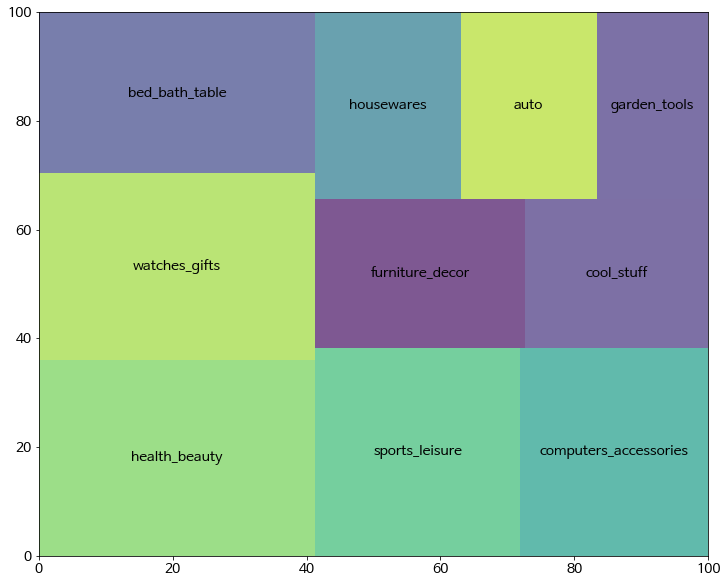

In [116]:
# 매출액 기준 상위 10개만
# import squarify

plt.figure(figsize=(12,10))
squarify.plot(sizes=temp['order_amount'][:10],
             label=temp.index.values[:10], alpha=.7)

**=> 가장 높은 매출액을 보이는 상품 카테고리는 "health_beauty" 입니다.** 

***
#### **상품 카테고리별 주문 수와 매출액의 관계**

In [117]:
# 카테고리별 주문수

df_cat_order_cnt = pd.DataFrame(df_order_item_prod_clean['product_category_name_english'].value_counts())
df_cat_order_cnt = df_cat_order_cnt.reset_index()
df_cat_order_cnt.columns = ['category', 'order_cnt']
df_cat_order_cnt

,category,order_cnt
0,bed_bath_table,10160
1,health_beauty,9022
2,sports_leisure,7858
3,computers_accessories,6887
4,furniture_decor,6781
...,...,...
66,arts_and_craftmanship,24
67,la_cuisine,13
68,cds_dvds_musicals,12
69,fashion_childrens_clothes,8


In [118]:
# 카테고리별 매출액순

df_cat_amount = pd.DataFrame(df_order_item_prod_clean.groupby(by=['product_category_name_english'])['order_amount'].sum())
df_cat_amount = df_cat_amount.sort_values(by='order_amount',ascending=False)
df_cat_amount = df_cat_amount.reset_index()
df_cat_amount.columns = ['category', 'order_amount']
df_cat_amount

,category,order_amount
0,health_beauty,1258681.34
1,watches_gifts,1205005.68
2,bed_bath_table,1036988.68
3,sports_leisure,988048.97
4,computers_accessories,911954.32
...,...,...
66,flowers,1110.04
67,home_comfort_2,760.27
68,cds_dvds_musicals,730.00
69,fashion_childrens_clothes,569.85


**=> 두 테이블을 비교해주기 위해 스케일을 맞춰줍니다.**

In [119]:
# percentile

df_cat_order_cnt['order_cnt_perc'] = (df_cat_order_cnt['order_cnt'] / sum(df_cat_order_cnt['order_cnt']))*100
df_cat_order_cnt

,category,order_cnt,order_cnt_perc
0,bed_bath_table,10160,10.07
1,health_beauty,9022,8.94
2,sports_leisure,7858,7.78
3,computers_accessories,6887,6.82
4,furniture_decor,6781,6.72
...,...,...,...
66,arts_and_craftmanship,24,0.02
67,la_cuisine,13,0.01
68,cds_dvds_musicals,12,0.01
69,fashion_childrens_clothes,8,0.01


In [120]:
# percentile

df_cat_amount['order_amount_perc'] = (df_cat_amount['order_amount'] / sum(df_cat_amount['order_amount']))*100
df_cat_amount

,category,order_amount,order_amount_perc
0,health_beauty,1258681.34,9.39
1,watches_gifts,1205005.68,8.99
2,bed_bath_table,1036988.68,7.74
3,sports_leisure,988048.97,7.37
4,computers_accessories,911954.32,6.80
...,...,...,...
66,flowers,1110.04,0.01
67,home_comfort_2,760.27,0.01
68,cds_dvds_musicals,730.00,0.01
69,fashion_childrens_clothes,569.85,0.00


In [121]:
df_cat = pd.merge(df_cat_order_cnt, df_cat_amount,
        how='inner', on='category')
df_cat

,category,order_cnt,order_cnt_perc,order_amount,order_amount_perc
0,bed_bath_table,10160,10.07,1036988.68,7.74
1,health_beauty,9022,8.94,1258681.34,9.39
2,sports_leisure,7858,7.78,988048.97,7.37
3,computers_accessories,6887,6.82,911954.32,6.80
4,furniture_decor,6781,6.72,729762.49,5.44
...,...,...,...,...,...
66,arts_and_craftmanship,24,0.02,1814.01,0.01
67,la_cuisine,13,0.01,2054.99,0.02
68,cds_dvds_musicals,12,0.01,730.00,0.01
69,fashion_childrens_clothes,8,0.01,569.85,0.00


**=> 카테고리가 너무 많으므로 매출액 기준 상위 10개만 그려봅니다.**

In [122]:
df_cat = df_cat.sort_values(by='order_amount', ascending=False)
df_cat = df_cat.reset_index(drop=True)
df_cat

,category,order_cnt,order_cnt_perc,order_amount,order_amount_perc
0,health_beauty,9022,8.94,1258681.34,9.39
1,watches_gifts,5799,5.74,1205005.68,8.99
2,bed_bath_table,10160,10.07,1036988.68,7.74
3,sports_leisure,7858,7.78,988048.97,7.37
4,computers_accessories,6887,6.82,911954.32,6.80
...,...,...,...,...,...
66,flowers,29,0.03,1110.04,0.01
67,home_comfort_2,24,0.02,760.27,0.01
68,cds_dvds_musicals,12,0.01,730.00,0.01
69,fashion_childrens_clothes,8,0.01,569.85,0.00


**(참고)**
- [pandas의 melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html)

In [123]:
# melt

df_cat_melt = pd.melt(df_cat[:10], 
                      id_vars=['category'], 
                      value_vars=['order_cnt_perc','order_amount_perc'])
df_cat_melt

,category,variable,value
0,health_beauty,order_cnt_perc,8.94
1,watches_gifts,order_cnt_perc,5.74
2,bed_bath_table,order_cnt_perc,10.07
3,sports_leisure,order_cnt_perc,7.78
4,computers_accessories,order_cnt_perc,6.82
5,furniture_decor,order_cnt_perc,6.72
6,cool_stuff,order_cnt_perc,3.62
7,housewares,order_cnt_perc,5.96
8,auto,order_cnt_perc,3.95
9,garden_tools,order_cnt_perc,3.57


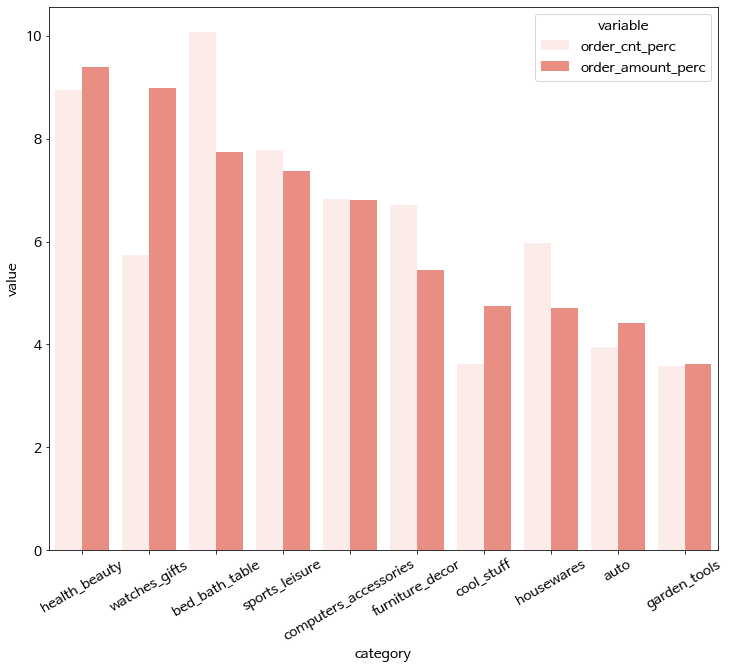

In [124]:
plt.figure(figsize=(12,10))
ax = sns.barplot(data = df_cat_melt,
                 x="category",
                 y="value",
                 hue="variable",
                 color="salmon"
                )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

**=> 매출액이 가장 높은 health_beauty의 경우, 주문수도 함께 많은 것을 알 수 있습니다. watches_gifts는 주문수는 상대적으로 많은 편이 아니지만, 전체 매출에서 두번째로 높은 모습을 보이고 있는 것으로 볼 때, 시계와 같이 객당 단가가 높은 상품이 포함된 카테고리의 특징으로 생각해볼 수 있습니다.**

***
#### **카테고리에 따른 월별 매출액이 어떠한지 확인해봅니다.**  
현재 df_order_item_prod_clean 테이블에는 구매가 발생한 상세월에 대한 정보가 없습니다. 따라서, 이러한 정보를 포함하고 있는 order_df 테이블과 함께 추출하여야 합니다.

**집계 기준**
- 매출이 발생한 시점은 "order_approved_at"을 기준으로 합니다.
- "order_status"가 "delivered"된 값만 집계합니다.

**활용 테이블**
- df_order_clean
- df_order_item_prod_clean

In [125]:
print(df_order_clean.shape)
print(df_order_item_prod_clean.shape)

(96461, 14)
(100942, 17)


**(참고)**
- [datetime](https://docs.python.org/ko/3/library/datetime.html)  
- [날짜시간모듈](https://devanix.tistory.com/306)
- [데이터형태-날짜](https://devanix.tistory.com/306)

In [126]:
# for문을 이용하여 구매(결제)발생 'date' 정보 추가해주기
# row가 많아 시간이 조금 걸릴 수 있습니다.
# date.strftime(format) : 지정된 포맷에 맞춰 date 객체의 정보를 문자열로 반환합니다.

for i in range(len(df_order_clean)):
    
    # i번째 'date'칼럼에 원하는 값 지정
    date = df_order_clean['order_approved_at'][i].strftime('%Y%m')
    df_order_clean.loc[ i, 'order_date'] = date
    
df_order_clean['order_date']

0        201710
1        201807
2        201808
3        201711
4        201802
          ...  
96456    201703
96457    201802
96458    201708
96459    201801
96460    201803
Name: order_date, Length: 96461, dtype: object

**(참고)**
- [pandas의 apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html?highlight=apply#pandas.DataFrame.apply)
- [apply함수 적용하기](https://wikidocs.net/46758)
- [apply and lambda](https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7)
- [파이썬에서 날짜와 시간 다루기](https://datascienceschool.net/view-notebook/465066ac92ef4da3b0aba32f76d9750a/)
- [Python 날짜, 시간 처리하기](https://minus31.github.io/2018/07/28/python-date/)

In [127]:
# apply lambda

df_order_clean['order_date'] = df_order_clean['order_approved_at'].apply(lambda x : x.strftime('%Y%m') )
df_order_clean['order_date']

0        201710
1        201807
2        201808
3        201711
4        201802
          ...  
96456    201703
96457    201802
96458    201708
96459    201801
96460    201803
Name: order_date, Length: 96461, dtype: object

In [128]:
df_order_clean.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,pay_lead_time,pay_lead_time_m,delivery_lead_time,delivery_lead_time_D,estimated_date_miss,estimated_date_miss_D,order_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,10,8 days 10:17:58,8,7 days 02:34:47,7,201710
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,1842,12 days 12:03:18,12,5 days 08:32:15,5,201807
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,16,9 days 09:11:06,9,17 days 05:53:31,17,201808
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,17,13 days 04:42:43,13,12 days 23:31:18,12,201711
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,61,2 days 19:56:33,2,9 days 05:42:58,9,201802


In [129]:
# 두 테이블을 merge 합니다.

df_order_tmp = pd.merge(df_order_clean, df_order_item_prod_clean,\
                         how='inner', on=['order_id'])
df_order_tmp

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,pay_lead_time,pay_lead_time_m,...,order_amount,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,10,...,29.99,utilidades_domesticas,housewares,40.00,268.00,4.00,500.00,19.00,8.00,13.00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,1842,...,118.70,perfumaria,perfumery,29.00,178.00,1.00,400.00,19.00,13.00,19.00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,16,...,159.90,automotivo,auto,46.00,232.00,1.00,420.00,24.00,19.00,21.00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,17,...,45.00,pet_shop,pet_shop,59.00,468.00,3.00,450.00,30.00,10.00,20.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,61,...,19.90,papelaria,stationery,38.00,316.00,4.00,250.00,51.00,15.00,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98754,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,0 days 00:00:00,0,...,72.00,beleza_saude,health_beauty,50.00,1517.00,1.00,1175.00,22.00,13.00,18.00
98755,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0 days 00:11:39,11,...,174.90,bebes,baby,52.00,828.00,4.00,4950.00,40.00,10.00,40.00
98756,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0 days 00:17:33,17,...,205.99,eletrodomesticos_2,home_appliances_2,51.00,500.00,2.00,13300.00,32.00,90.00,22.00
98757,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,7,...,359.98,informatica_acessorios,computers_accessories,59.00,1893.00,1.00,6550.00,20.00,20.00,20.00


In [130]:
# 결측치 확인

df_order_tmp.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
pay_lead_time                    0
pay_lead_time_m                  0
delivery_lead_time               0
delivery_lead_time_D             0
estimated_date_miss              0
estimated_date_miss_D            0
order_date                       0
product_id                       0
price                            0
freight_value                    0
order_prod_quantity              0
shipping_limit_date              0
seller_id                        0
order_amount                     0
product_category_name            0
product_category_name_english    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm   

In [131]:
df_order_tmp

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,pay_lead_time,pay_lead_time_m,...,order_amount,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,10,...,29.99,utilidades_domesticas,housewares,40.00,268.00,4.00,500.00,19.00,8.00,13.00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,1842,...,118.70,perfumaria,perfumery,29.00,178.00,1.00,400.00,19.00,13.00,19.00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,16,...,159.90,automotivo,auto,46.00,232.00,1.00,420.00,24.00,19.00,21.00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,17,...,45.00,pet_shop,pet_shop,59.00,468.00,3.00,450.00,30.00,10.00,20.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,61,...,19.90,papelaria,stationery,38.00,316.00,4.00,250.00,51.00,15.00,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98754,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,0 days 00:00:00,0,...,72.00,beleza_saude,health_beauty,50.00,1517.00,1.00,1175.00,22.00,13.00,18.00
98755,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0 days 00:11:39,11,...,174.90,bebes,baby,52.00,828.00,4.00,4950.00,40.00,10.00,40.00
98756,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0 days 00:17:33,17,...,205.99,eletrodomesticos_2,home_appliances_2,51.00,500.00,2.00,13300.00,32.00,90.00,22.00
98757,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,7,...,359.98,informatica_acessorios,computers_accessories,59.00,1893.00,1.00,6550.00,20.00,20.00,20.00


***
**[엑셀에서 피벗테이블 생성하기]**
***

**(참고)**
- [pandas의 pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [132]:
# pivot_table

df_order_pivot = df_order_tmp.pivot_table(
                              values='order_amount',
                              index='product_category_name_english',
                              columns='order_date',
                              aggfunc='mean')

df_order_pivot

order_date,201609,201610,201612,201701,201702,201703,201704,201705,201706,201707,...,201711,201712,201801,201802,201803,201804,201805,201806,201807,201808
product_category_name_english,,,,,,,,,,,,,,,,,,,,,
agro_industry_and_commerce,nan,nan,nan,32.98,32.12,41.00,nan,394.99,1390.00,1180.00,...,1071.73,587.97,388.67,339.86,240.78,400.35,375.18,351.58,256.53,358.65
air_conditioning,nan,337.32,nan,221.23,218.66,269.59,182.30,152.48,231.61,292.30,...,254.79,222.93,220.04,190.39,128.92,148.70,142.16,396.43,166.12,209.23
art,nan,nan,nan,nan,nan,43.65,nan,1006.74,50.08,128.92,...,75.00,38.42,133.72,110.61,65.93,82.41,76.02,89.29,88.66,81.65
arts_and_craftmanship,nan,nan,nan,nan,nan,nan,nan,21.99,nan,129.90,...,nan,nan,nan,nan,nan,15.99,89.80,nan,59.51,100.20
audio,nan,78.50,nan,nan,32.76,87.29,104.69,122.42,151.91,112.28,...,112.51,153.55,155.49,192.94,298.80,259.94,131.08,96.35,98.22,86.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stationery,nan,nan,nan,223.14,123.23,105.94,127.35,88.89,91.94,94.87,...,103.60,104.65,105.14,76.75,85.94,86.55,102.54,83.47,96.49,97.80
tablets_printing_image,nan,nan,nan,nan,99.00,99.00,116.55,201.33,99.00,99.00,...,58.40,69.90,53.93,57.91,129.65,52.00,49.90,50.00,nan,nan
telephony,nan,32.61,nan,39.79,71.43,49.97,50.66,43.88,44.15,64.45,...,74.85,53.21,41.51,41.00,76.89,65.13,78.10,110.21,127.10,150.07


**=> 2016년부터 2018년까지 전체 매출이 가장 높았던 health_beauty 카테고리의 월별 변화량을 시각화 해봅니다.**

In [133]:
df_order_pivot.loc["health_beauty",:]

order_date
201609   134.97
201610    91.82
201612      nan
201701   147.45
201702   154.94
201703   131.73
201704   124.02
201705   169.68
201706   144.02
201707   124.40
201708   144.46
201709   139.74
201710   125.86
201711   146.67
201712   137.73
201801   126.28
201802   138.71
201803   138.79
201804   142.57
201805   137.28
201806   133.00
201807   143.92
201808   151.06
Name: health_beauty, dtype: float64

In [134]:
df_health_beauty = pd.DataFrame(df_order_pivot.loc["health_beauty",:])
df_health_beauty = df_health_beauty.reset_index()
df_health_beauty.columns = ['date', 'health_beauty_amount']
df_health_beauty.dropna(inplace=True)
df_health_beauty

,date,health_beauty_amount
0,201609,134.97
1,201610,91.82
3,201701,147.45
4,201702,154.94
5,201703,131.73
6,201704,124.02
7,201705,169.68
8,201706,144.02
9,201707,124.40
10,201708,144.46


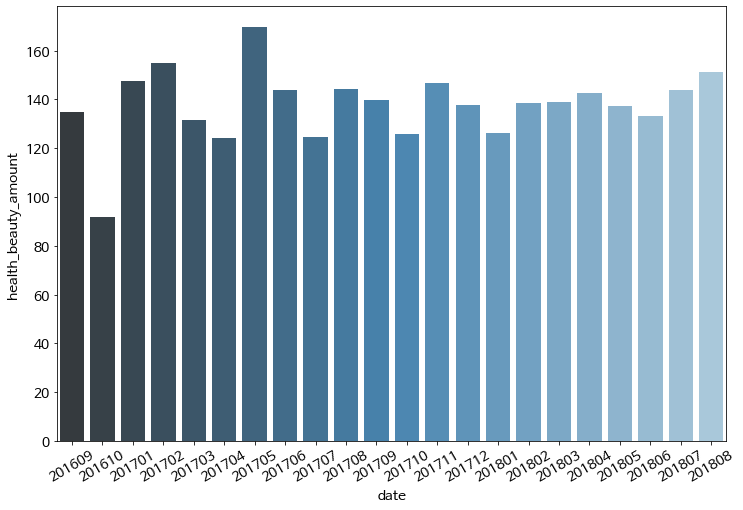

In [135]:
# bar chart

plt.figure(figsize=(12,8))
sns.barplot(data = df_health_beauty,
                 x='date',
                 y="health_beauty_amount",
                 palette="Blues_d"
                )
# ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.xticks(fontsize=14, rotation=30)
plt.show()

**=> 시간의 변화에 따른 추이를 살펴보기 위해서는 꺾은선 그래프가 적합합니다.**

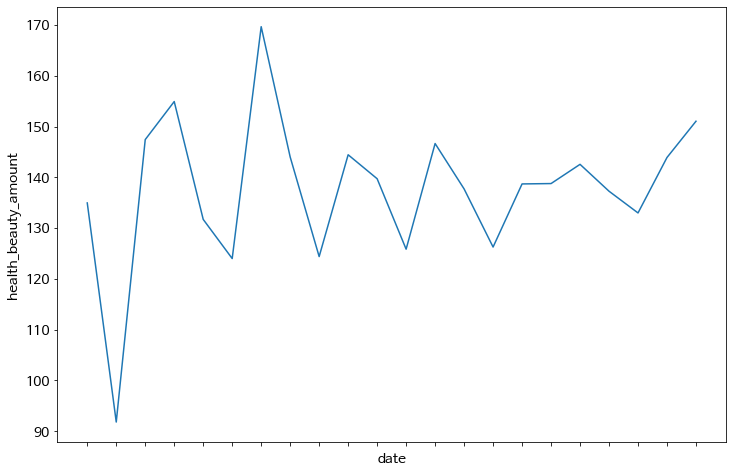

In [136]:
# lineplot

plt.figure(figsize=(12,8))
ax = sns.lineplot(data = df_health_beauty,
                 x='date',
                 y="health_beauty_amount",
                 palette="Blues_d"
                )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

***
### **네번째로 살펴볼 테이블 : olist_order_payments**
**다음으로는 고객들이 주문 결제를 어떻게 했는지, 결제정보가 담긴 테이블에 대해 살펴보겠습니다.**

In [137]:
# 결제 테이블

df_order_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [138]:
# 결측치 확인

df_order_pay.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [139]:
print(df_order_pay.shape)
df_order_pay.sample(3)

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
72656,32b719ae1cbb8bd2e7a59704cdd4146f,1,credit_card,4,144.64
63744,b06bc7a576465f0015213ab5ab899ef8,1,credit_card,1,120.39
79977,88c8805f126160713535daf5badbd485,1,credit_card,6,375.26


In [140]:
df_order_pay.describe()

,payment_sequential,payment_installments,payment_value
count,103886.00,103886.00,103886.00
mean,1.09,2.85,154.10
std,0.71,2.69,217.49
min,1.00,0.00,0.00
25%,1.00,1.00,56.79
50%,1.00,1.00,100.00
75%,1.00,4.00,171.84
max,29.00,24.00,13664.08


In [141]:
df_order_pay[df_order_pay['payment_sequential']==df_order_pay['payment_sequential'].max()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
39108,fa65dad1b0e818e3ccc5cb0e39231352,29,voucher,1,19.26


In [142]:
df_order_pay[df_order_pay['order_id']=='fa65dad1b0e818e3ccc5cb0e39231352'].sort_values(by='payment_sequential')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
65641,fa65dad1b0e818e3ccc5cb0e39231352,3,voucher,1,2.95
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02
82593,fa65dad1b0e818e3ccc5cb0e39231352,7,voucher,1,0.32
68853,fa65dad1b0e818e3ccc5cb0e39231352,8,voucher,1,26.02
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86


**=> 데이터스키마에는 payment_sequential 칼럼은 "지불 방법의 종류"라고 설명되어 있습니다. 위의 결과를 보면 동일한 주문번호 내 payment_type이 voucher로, payment_sequential이 다르게 부여된 것으로 볼 때, 이 주문은 각기 다른 바우처(=상품권)를 사용된 것으로 예상해볼 수 있습니다.**

[바우처](https://ko.wikipedia.org/wiki/%EB%B0%94%EC%9A%B0%EC%B2%98)

In [143]:
# 결제 방법이 많았던 수

df_order_pay['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

**=> credit_card 의 경우 payment_installments에 대해 알아봅니다.**

In [144]:
df_credit = df_order_pay[df_order_pay['payment_type']=='credit_card']
df_credit

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


In [145]:
df_credit.describe()

,payment_sequential,payment_installments,payment_value
count,76795.00,76795.00,76795.00
mean,1.00,3.51,163.32
std,0.06,2.85,222.12
min,1.00,0.00,0.01
25%,1.00,1.00,62.21
50%,1.00,3.00,106.87
75%,1.00,5.00,181.21
max,3.00,24.00,13664.08


**=> payment_type 별로 payment_installments는 어떨지 확인해봅니다.**

In [146]:
df_order_pay.groupby(['payment_type'])['payment_installments'].mean()

payment_type
boleto        1.00
credit_card   3.51
debit_card    1.00
not_defined   1.00
voucher       1.00
Name: payment_installments, dtype: float64

In [147]:
# 고객들이 많이 선택한 결제 방법 별 수

df_order_pay['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [148]:
# 고객들이 많이 선택한 결제 방법 별 비율

df_order_pay['payment_type'].value_counts(normalize=True)*100 # 퍼센트

credit_card   73.92
boleto        19.04
voucher        5.56
debit_card     1.47
not_defined    0.00
Name: payment_type, dtype: float64

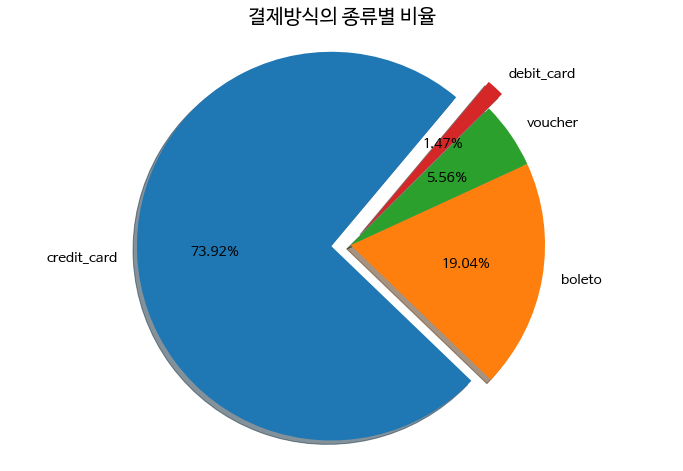

In [149]:
# pie 그래프 

temp = pd.DataFrame(df_order_pay['payment_type'].value_counts(normalize=True)*100)
temp = temp[temp.index != 'not_defined'] # 너무 작은 수라 제외함

labels = temp.index
sizes = temp['payment_type']

explode = (0.1, 0, 0, 0.1) 

plt.pie(
        sizes, 
        labels=labels, 
        explode=explode, 
        autopct='%1.2f%%', # second decimal place
        shadow=True, 
        startangle=50,
        textprops={'fontsize': 14} # text font size
        ) 

plt.axis('equal') #  equal length of X and Y axis
plt.title('결제방식의 종류별 비율', fontsize=20)
plt.show()

***
### **다섯번째로 살펴볼 테이블 : olist_order_reviews**
**다섯번째로, 고객들의 리뷰에 대해 살펴보겠습니다.**

In [150]:
df_order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   review_id                100000 non-null  object        
 1   order_id                 100000 non-null  object        
 2   review_score             100000 non-null  int64         
 3   review_comment_title     11715 non-null   object        
 4   review_comment_message   41753 non-null   object        
 5   review_creation_date     100000 non-null  datetime64[ns]
 6   review_answer_timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [151]:
# 결측치 확인

df_order_review.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [152]:
df_order_review.sample(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
65011,9b403c384717779464e1122abcbe662a,5ad67427b38c94669fc35ffc73bce412,5,Excelente,NaN,2018-08-24,2018-08-24 19:44:15
74295,315ba11769bd548306b60d3067ba0bab,b9b90be72479c512c6ab9824a1ce256c,5,NaN,NaN,2017-09-28,2017-09-29 18:45:15
36962,a808728acae990796e10aa79d43b9d25,a510c00bf911ad87c19350719d460ecd,5,NaN,NaN,2017-12-16,2017-12-18 19:46:26
27079,6cc7e2920cda258af91a3d5fb19d2a6f,b70947b76f548d986539b3a43ae9674b,5,NaN,Adorei é lindo!,2018-05-09,2018-05-16 12:37:41
18592,dbd6c3ff0836c1d038ae3bbd3002249a,9fa7644baa5eef65cf160c3c71983e6f,5,NaN,Boa noite os produtos são de ótima qualidade s...,2018-02-10,2018-02-12 23:05:09
78227,1a877f306409bb869338196063c219b4,b382fb5001304e782c71526663c196ce,5,NaN,NaN,2018-04-05,2018-04-08 00:42:01
73270,f0473d83042796f4c684c8c626f235a0,1230f41d95a6fc74a51d388e8b1e8810,3,NaN,"O produto é o que eu pedi, chegou muito rápido...",2018-08-14,2018-08-15 10:05:01
70116,1446f5f17053b93b163a7e87e35d2c9a,a6ef08d145dd686f85530958e1100ea1,5,NaN,NaN,2017-07-05,2017-07-05 23:17:13
68615,6967a9b96d0bbf2ca6568c77eb71ed82,c2e858dea271d5346de79ab8859bc5d2,5,Recomendo !,Produto venho em ótimo estado \r\nPerfeitament...,2018-05-29,2018-05-29 20:59:02
36346,49158844ebe436d84bbafbac6170cf26,531a41568e23a7a1b2d62fe6e5842149,5,NaN,NaN,2018-03-25,2018-03-25 23:12:17


In [153]:
df_order_review.describe()

,review_score
count,100000.00
mean,4.07
std,1.36
min,1.00
25%,4.00
50%,5.00
75%,5.00
max,5.00


In [154]:
df_review = pd.DataFrame(df_order_review['review_score'].value_counts())
df_review.reset_index(inplace=True)
df_review.columns = ['review_score', 'cnt']
df_review

,review_score,cnt
0,5,57420
1,4,19200
2,1,11858
3,3,8287
4,2,3235


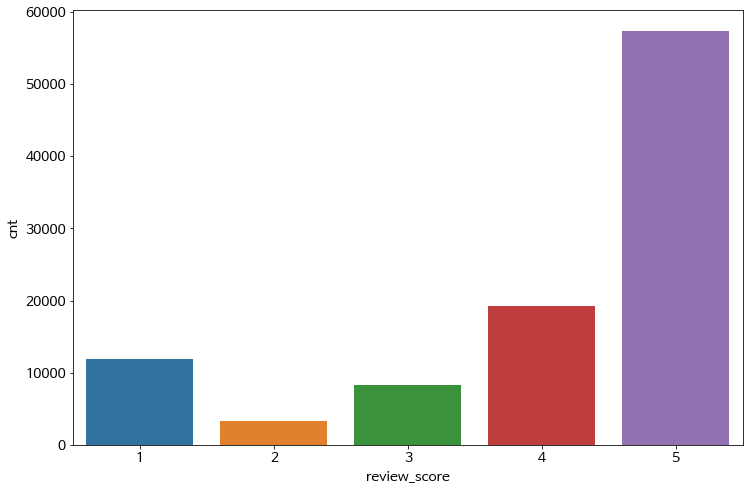

In [155]:
sns.barplot(data = df_review,
           x = 'review_score',
           y = 'cnt')

In [156]:
# review_score

df_order_review['review_score'].value_counts(normalize=True)*100

5   57.42
4   19.20
1   11.86
3    8.29
2    3.23
Name: review_score, dtype: float64

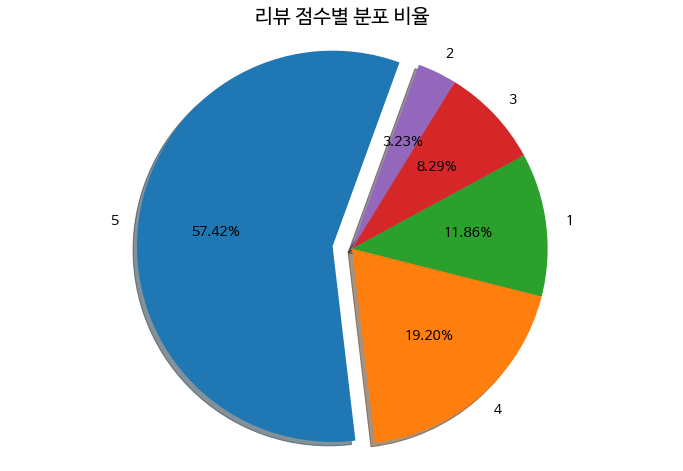

In [157]:
# review_score

temp = pd.DataFrame(df_order_review['review_score'].value_counts(normalize=True)*100)

labels = temp.index
sizes = temp['review_score']

explode = (0.1, 0, 0, 0, 0) 

plt.pie(
        sizes, 
        labels=labels, 
        explode=explode, 
        autopct='%1.2f%%', # second decimal place
        shadow=True, 
        startangle=70,
        textprops={'fontsize': 14} # text font size
        ) 

plt.axis('equal') #  equal length of X and Y axis
plt.title('리뷰 점수별 분포 비율', fontsize=20)
plt.show()

***
#### **고객들이 만족 서베이 작성까지 보통 얼마나 시간이 걸리는지 알아봅니다.**  
- review_creation_date : 고객한테 만족 서베이가 보내진 날짜
- review_answer_timestamp : 만족 서베이가 답변된 시간

In [158]:
# 고객의 리뷰 작성까지 걸리는 시간

df_order_review['answer_lead_time'] = df_order_review['review_answer_timestamp'] - df_order_review['review_creation_date']
df_order_review['answer_lead_time']

0       0 days 21:46:59
1       1 days 03:05:13
2       1 days 14:36:24
3       0 days 22:02:06
4       1 days 10:26:53
              ...      
99995   2 days 20:06:42
99996   1 days 09:10:43
99997   1 days 12:59:13
99998   1 days 01:29:43
99999   0 days 21:01:49
Name: answer_lead_time, Length: 100000, dtype: timedelta64[ns]

**(참고)**
- [pandas의 total_seconds](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.total_seconds.html)

In [159]:
# 고객의 리뷰 작성까지 걸리는 시간을 초 단위로

# df_order_review['answer_lead_time'][0].components
df_order_review['answer_lead_time'][0].total_seconds()

78419.0

In [160]:
# 실제 계산해봅니다.

21*60*60 + 46*60 + 59

78419

In [161]:
# 고객의 리뷰 작성까지 걸리는 시간을 초 단위로

df_order_review['answer_lead_time_seconds'] = df_order_review['answer_lead_time'].apply(lambda x : x.total_seconds())
df_order_review['answer_lead_time_seconds']

0        78419.00
1        97513.00
2       138984.00
3        79326.00
4       124013.00
           ...   
99995   245202.00
99996   119443.00
99997   133153.00
99998    91783.00
99999    75709.00
Name: answer_lead_time_seconds, Length: 100000, dtype: float64

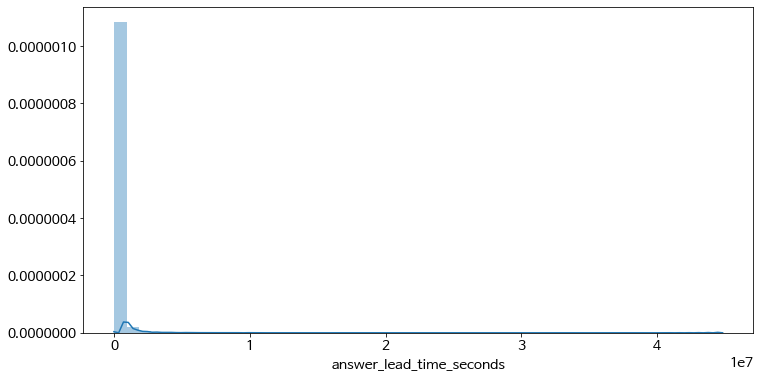

In [162]:
# answer_lead_time_seconds

plt.figure(figsize=(12,6))
sns.distplot(df_order_review['answer_lead_time_seconds'])

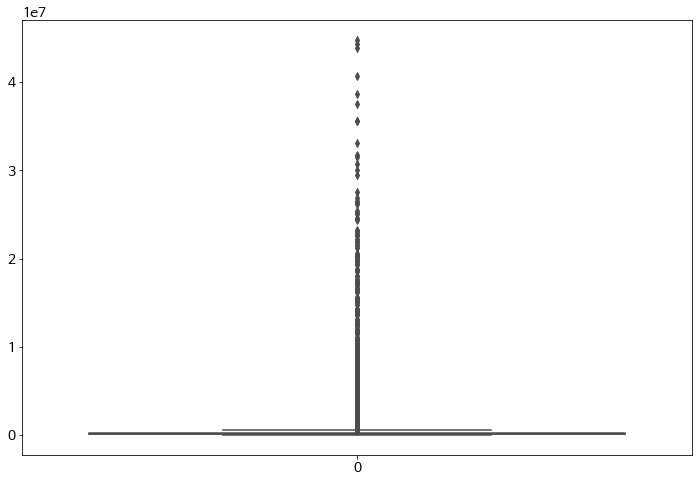

In [163]:
# answer_lead_time_seconds

plt.figure(figsize=(12,8))
sns.boxplot(data=df_order_review['answer_lead_time_seconds'], color='yellow')

In [164]:
# outlier 검출 코드
import numpy as np

def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((data > upper_bound)|(data < lower_bound))

In [165]:
# answer_lead_time_seconds 이상치 수

print("이상치 수 : {} 건".format(outliers_iqr(df_order_review['answer_lead_time_seconds'])[0].shape[0]))

이상치 수 : 6364 건


In [166]:
# # answer_lead_time_seconds 이상치

df_order_review.loc[outliers_iqr(df_order_review['answer_lead_time_seconds'])[0],'answer_lead_time_seconds']

21      1626071.00
23      3291947.00
24       773938.00
27       779271.00
37       776245.00
           ...    
99963    696712.00
99973    838272.00
99975   5016206.00
99983   1108043.00
99994    667110.00
Name: answer_lead_time_seconds, Length: 6364, dtype: float64

In [167]:
# answer_lead_time 이상치

df_order_review.loc[outliers_iqr(df_order_review['answer_lead_time'])[0],'answer_lead_time'].sort_values(ascending=False)

41932   518 days 16:46:52
67212   512 days 15:47:37
22219   508 days 01:36:09
8819    471 days 16:19:53
14022   446 days 20:51:34
               ...       
74703     6 days 07:06:56
67580     6 days 06:36:53
28486     6 days 06:32:43
49471     6 days 06:23:37
17521     6 days 06:18:27
Name: answer_lead_time, Length: 6364, dtype: timedelta64[ns]

***
#### **이번에는 고객의 만족도와 관계있는 칼럼들을 살펴보겠습니다.**
활용테이블
- olist_orders_dataset (= df_order_clean)
- olist_order_reviews_dataset (=df_order_review)

In [168]:
# df_order_clean을 기준으로 merge

df_satisfy = pd.merge(df_order_clean, df_order_review,\
                how='left', on=['order_id'])

df_satisfy.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,pay_lead_time,pay_lead_time_m,...,estimated_date_miss_D,order_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,answer_lead_time,answer_lead_time_seconds
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,10,...,7,201710,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1 days 03:43:48,99828.00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,1842,...,5,201807,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,0 days 18:37:50,67070.00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,16,...,17,201808,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58,4 days 19:07:58,414478.00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,17,...,12,201711,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58,2 days 19:21:58,242518.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,61,...,9,201802,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17,2018-02-18 13:02:51,1 days 13:02:51,133371.00


In [169]:
df_satisfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96998 entries, 0 to 96997
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       96998 non-null  object         
 1   customer_id                    96998 non-null  object         
 2   order_status                   96998 non-null  object         
 3   order_purchase_timestamp       96998 non-null  datetime64[ns] 
 4   order_approved_at              96998 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   96998 non-null  datetime64[ns] 
 6   order_delivered_customer_date  96998 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  96998 non-null  datetime64[ns] 
 8   pay_lead_time                  96998 non-null  timedelta64[ns]
 9   pay_lead_time_m                96998 non-null  int32          
 10  delivery_lead_time             96998 non-null  timedelta64[ns]
 11  de

In [170]:
# 결측치 확인

df_satisfy.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    0
order_delivered_carrier_date         0
order_delivered_customer_date        0
order_estimated_delivery_date        0
pay_lead_time                        0
pay_lead_time_m                      0
delivery_lead_time                   0
delivery_lead_time_D                 0
estimated_date_miss                  0
estimated_date_miss_D                0
order_date                           0
review_id                            0
review_score                         0
review_comment_title             85677
review_comment_message           57251
review_creation_date                 0
review_answer_timestamp              0
answer_lead_time                     0
answer_lead_time_seconds             0
dtype: int64

In [171]:
df_satisfy.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'pay_lead_time', 'pay_lead_time_m', 'delivery_lead_time',
       'delivery_lead_time_D', 'estimated_date_miss', 'estimated_date_miss_D',
       'order_date', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'answer_lead_time',
       'answer_lead_time_seconds'],
      dtype='object')

In [172]:
# 고객 만족도(review_score) 확인을 위한 데이터셋

df_cust_sf = df_satisfy[[
                    'pay_lead_time_m',
                    'delivery_lead_time_D',
                    'estimated_date_miss_D',
                    'answer_lead_time_seconds',
                    'review_score'
                    ]]
df_cust_sf

,pay_lead_time_m,delivery_lead_time_D,estimated_date_miss_D,answer_lead_time_seconds,review_score
0,10,8,7,99828.00,4
1,1842,12,5,67070.00,4
2,16,9,17,414478.00,5
3,17,13,12,242518.00,5
4,61,2,9,133371.00,5
...,...,...,...,...,...
96993,0,8,10,126128.00,5
96994,11,22,1,150601.00,4
96995,17,24,5,83457.00,5
96996,7,17,20,119816.00,2


In [173]:
df_cust_sf.describe()

,pay_lead_time_m,delivery_lead_time_D,estimated_date_miss_D,answer_lead_time_seconds,review_score
count,96998.00,96998.00,96998.00,96998.00,96998.00
mean,616.45,11.65,10.88,271640.85,4.14
std,1231.73,9.52,10.18,842650.09,1.30
min,0.00,-7.00,-189.00,7709.00,1.00
25%,12.00,6.00,6.00,87407.25,4.00
50%,20.00,9.00,11.00,145268.00,5.00
75%,872.00,15.00,16.00,268945.75,5.00
max,44486.00,208.00,146.00,44815612.00,5.00


**(참고)**
- [상관분석-위키](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)
- [상관분석관련-블로그](http://blog.naver.com/PostView.nhn?blogId=y4769&logNo=220227007641)
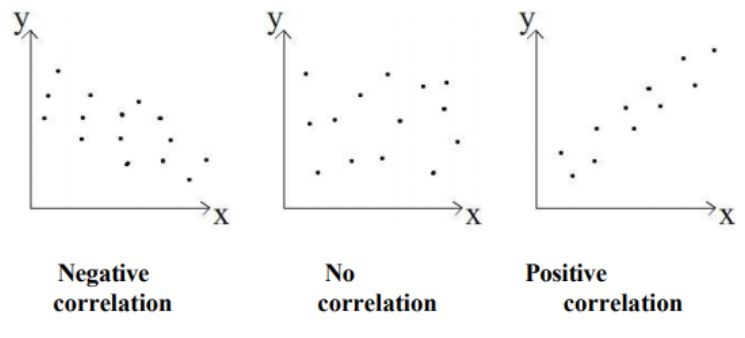

In [174]:
# 상관계수

corr = df_cust_sf.corr(method='pearson')
corr

,pay_lead_time_m,delivery_lead_time_D,estimated_date_miss_D,answer_lead_time_seconds,review_score
pay_lead_time_m,1.00,-0.01,-0.04,-0.00,-0.02
delivery_lead_time_D,-0.01,1.00,-0.61,0.01,-0.33
estimated_date_miss_D,-0.04,-0.61,1.00,0.02,0.27
answer_lead_time_seconds,-0.00,0.01,0.02,1.00,0.01
review_score,-0.02,-0.33,0.27,0.01,1.00


**(참고)**
- [python의 heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [상관관계 분석 시각화](https://blog.naver.com/kiddwannabe/221763497317)

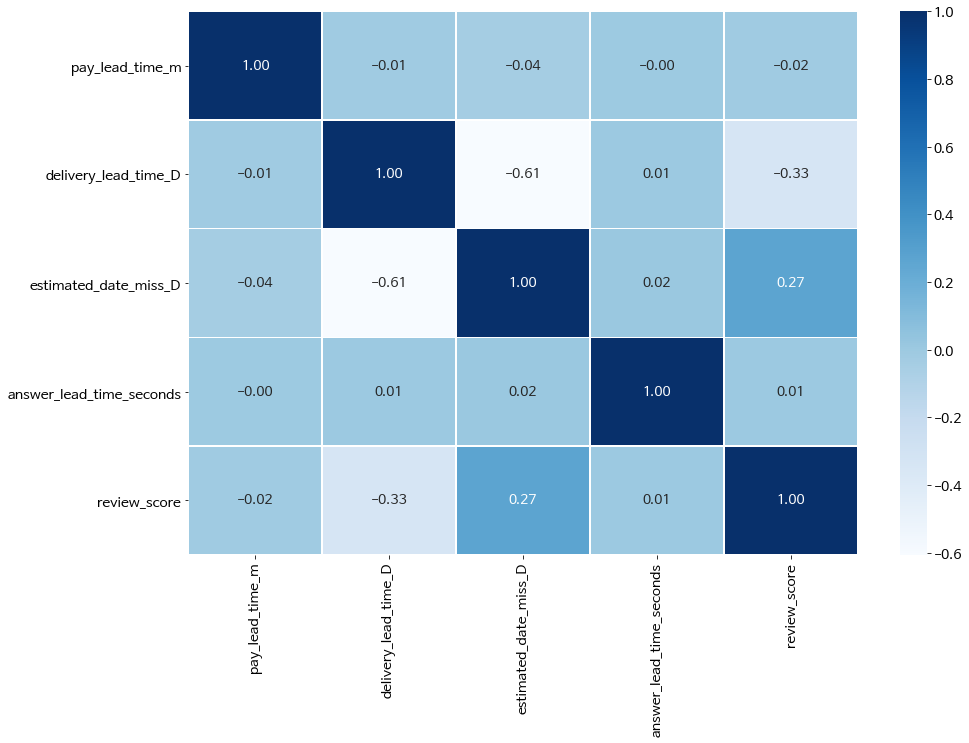

In [175]:
# 상관관계 히트맵

plt.figure(figsize=(15,10))
sns.heatmap(data = corr, 
            annot=True, 
            fmt = '.2f', 
            linewidths=.5, 
            cmap='Blues'
           )

**=> 상관관계 확인 결과, "review_score" 는 "delivery_lead_time" 과는 음의 상관관계를, "estimated_date_miss" 와는 약한 양의 상관관계를, "answer_lead_time_seconds" 와는 상관관계가 거의 없는 것으로 나타났습니다. 
즉, 고객한테 배송이 걸리는 시간이 짧을수록, 예정된 날짜보다 빨리 배송될수록 고객의 만족도가 높아짐을 확인할 수 있습니다.**

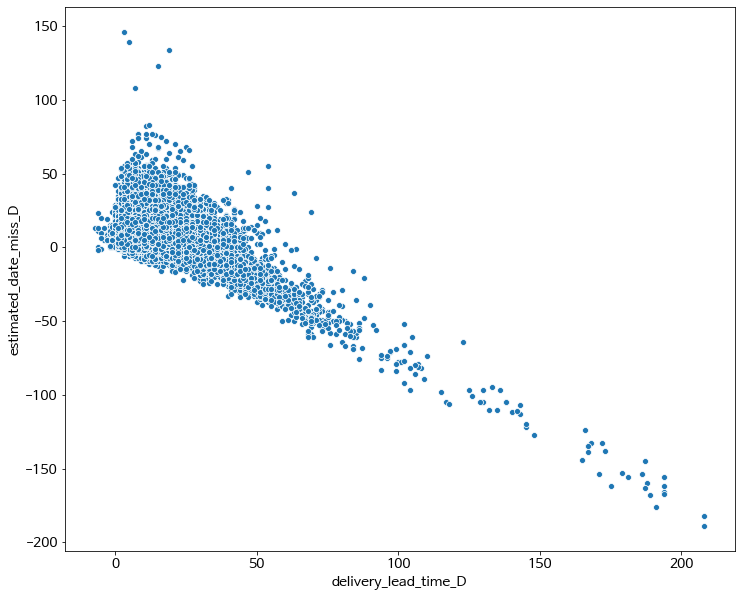

In [176]:
# 산점도를 그려봅니다.

plt.figure(figsize=(12,10))
sns.scatterplot(x='delivery_lead_time_D',
                y='estimated_date_miss_D',
               data=df_cust_sf)
plt.show()

"delivery_lead_time"과 "estimated_date_miss" 간에는 강한 음의 상관관계를 확인할 수 있는데, 이건 고객한테 배송이 되는 날짜가 짧을(빠를) 경우, 시스템에서 예측한 소요시간과의 차이가 많이남을 의미합니다.

***
### **여섯번째로 살펴볼 테이블 : olist_geolocation_dataset**
**여섯번째로, 지리정보 데이터셋에 대해 살펴보겠습니다.**

In [177]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [178]:
df_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.55,-46.64,sao paulo,SP
1,1046,-23.55,-46.64,sao paulo,SP
2,1046,-23.55,-46.64,sao paulo,SP
3,1041,-23.54,-46.64,sao paulo,SP
4,1035,-23.54,-46.64,sao paulo,SP


In [179]:
# state 별 도시 수

pd.DataFrame(df_geo.groupby(by=['geolocation_state'])['geolocation_city'].count().sort_values(ascending=False))

,geolocation_city
geolocation_state,
SP,404268
MG,126336
RJ,121169
RS,61851
PR,57859
SC,38328
BA,36045
GO,20139
ES,16748


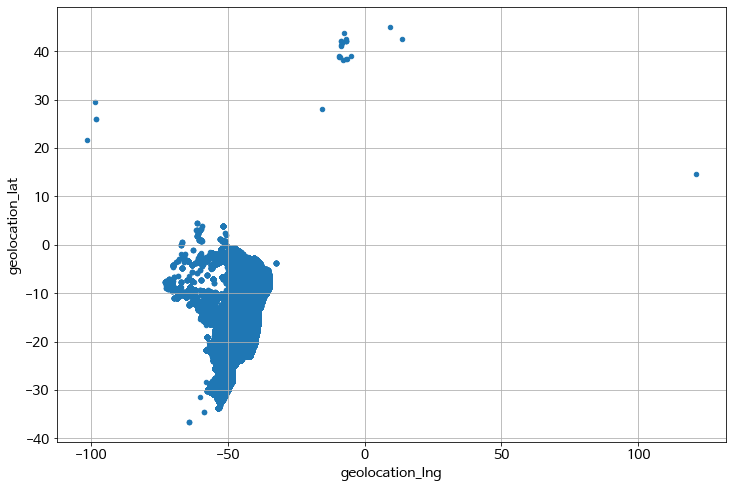

In [180]:
# 산점도

df_geo.plot.scatter(x='geolocation_lng', y='geolocation_lat', figsize=(12,8),grid=True)

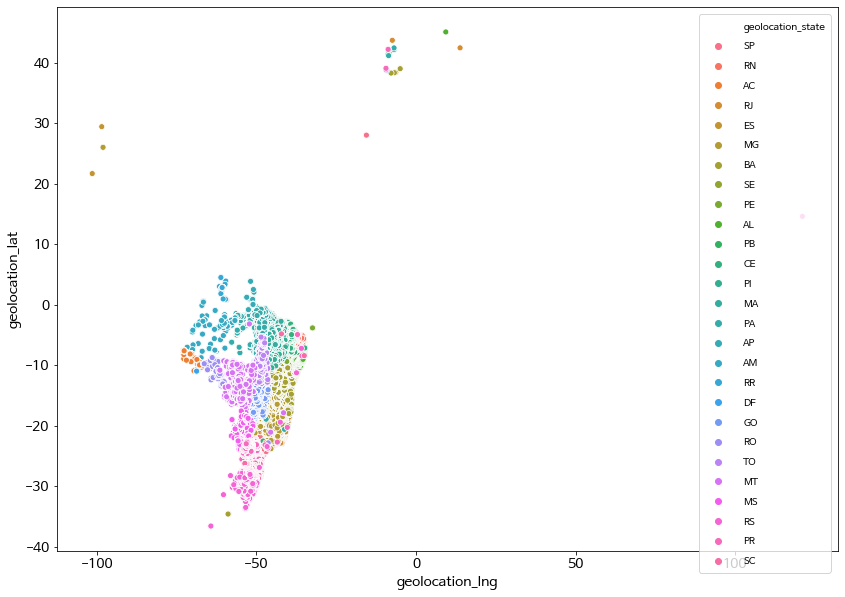

In [181]:
# state별 산점도

plt.figure(figsize=(14, 10))
ax = sns.scatterplot(data=df_geo, 
                     x='geolocation_lng', 
                     y='geolocation_lat', 
                     hue='geolocation_state')
plt.setp(ax.get_legend().get_texts(), fontsize='10')
plt.show()

***
### **일곱번째로 살펴볼 테이블 : olist_sellers_dataset**
**마지막으로, 셀러 데이터셋에 대해 살펴보겠습니다.**

In [182]:
df_seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [183]:
df_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [184]:
# seller의 state 별 도시 수

pd.DataFrame(df_seller.groupby(by=['seller_state'])['seller_city'].count().sort_values(ascending=False))

,seller_city
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


In [185]:
# seller가 많이 살고 있는 도시

df_seller['seller_city'].value_counts()

sao paulo          694
curitiba           127
rio de janeiro      96
belo horizonte      68
ribeirao preto      52
                  ... 
olimpia              1
mandirituba          1
minas gerais         1
brotas               1
nova petropolis      1
Name: seller_city, Length: 611, dtype: int64

***
#### **도시별 고객과 판매자 비율 비교**  
- df_seller['seller_city']
- df_cust['customer_city']

In [186]:
df_cust['customer_city'].value_counts()

sao paulo          15540
rio de janeiro      6882
belo horizonte      2773
brasilia            2131
curitiba            1521
                   ...  
flores de goias        1
centenario             1
lagoa real             1
messias targino        1
ipecaeta               1
Name: customer_city, Length: 4119, dtype: int64

In [187]:
# seller
df_seller_lives = pd.DataFrame(df_seller['seller_city'].value_counts(normalize=True)*100)
df_seller_lives.reset_index(inplace=True)
df_seller_lives.columns = ['city', 'seller_lives']

# customer
df_cust_lives = pd.DataFrame(df_cust['customer_city'].value_counts(normalize=True)*100)
df_cust_lives.reset_index(inplace=True)
df_cust_lives.columns = ['city', 'customer_lives']

# merge
df_seller_cust_lives = pd.merge(df_seller_lives, df_cust_lives,\
                        how='inner', on=['city'])

# 고객 수가 많은 순서대로
df_seller_cust_lives = df_seller_cust_lives.sort_values(by='customer_lives', ascending=False)
df_seller_cust_lives = df_seller_cust_lives.reset_index(drop=True)
df_seller_cust_lives

,city,seller_lives,customer_lives
0,sao paulo,22.42,15.63
1,rio de janeiro,3.10,6.92
2,belo horizonte,2.20,2.79
3,brasilia,0.90,2.14
4,curitiba,4.10,1.53
...,...,...,...
529,formosa do oeste,0.03,0.00
530,divisa nova,0.03,0.00
531,ilicinea,0.03,0.00
532,neopolis,0.03,0.00


In [188]:
# 고객 수가 많은 순서의 도시들 상위 10개만

top10 = df_seller_cust_lives[:10]
top10

,city,seller_lives,customer_lives
0,sao paulo,22.42,15.63
1,rio de janeiro,3.10,6.92
2,belo horizonte,2.20,2.79
3,brasilia,0.90,2.14
4,curitiba,4.10,1.53
5,campinas,1.32,1.45
6,porto alegre,0.90,1.39
7,salvador,0.23,1.25
8,guarulhos,1.62,1.20
9,sao bernardo do campo,1.03,0.94


In [189]:
# 시각화를 위한 데이터구조 변환

top10 = pd.melt(top10,
                id_vars=['city'], 
                value_vars=['seller_lives', 'customer_lives'])
top10

,city,variable,value
0,sao paulo,seller_lives,22.42
1,rio de janeiro,seller_lives,3.10
2,belo horizonte,seller_lives,2.20
3,brasilia,seller_lives,0.90
4,curitiba,seller_lives,4.10
5,campinas,seller_lives,1.32
6,porto alegre,seller_lives,0.90
7,salvador,seller_lives,0.23
8,guarulhos,seller_lives,1.62
9,sao bernardo do campo,seller_lives,1.03


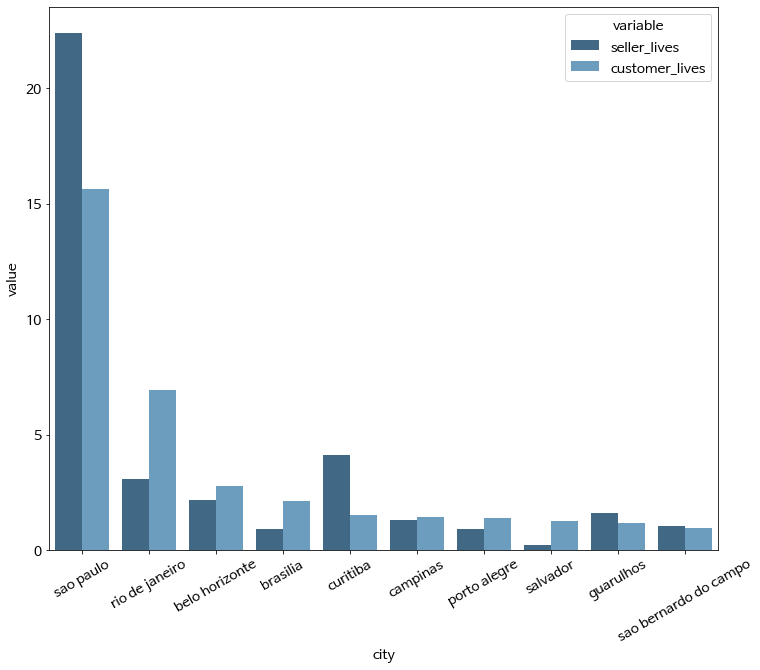

In [190]:
# 고객 수가 많은 순서의 도시들 상위 10개의 고객과 판매자 비율 비교

plt.figure(figsize=(12,10))
ax = sns.barplot(data = top10,
                 x="city",
                 y="value",
                 hue="variable",
#                  color="salmon",
                 palette="Blues_d"
                )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

**=> 판매자와 고객 모두 상파울루에 제일 많이 거주하고 있지만, 판매자 비율이 상대적으로 더 높음을 알 수 있습니다. 반면, 리우데자네이루의 경우, 판매자보다 고객의 비율이 더 높은데, 이런 점을 볼 때, 상파울루가 다른 도시들에 비해 판매자 비율이 상대적으로 더 높은 이유를 조금 더 찾아보는 것도 의미가 있겠습니다.**

***
#### **판매자 위치 정보 표시하기**

In [191]:
# column 이름 변경

df_seller_temp = df_seller.copy()
df_seller_temp.columns = ['seller_id', 'geolocation_zip_code_prefix', 'seller_city', 'seller_state']

In [192]:
# merge

df_seller_geo = pd.merge(df_seller_temp, df_geo,\
                         how='left', on=['geolocation_zip_code_prefix'])

df_seller_geo.sample(5)

,seller_id,geolocation_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
64925,26b482dccfa29bd2e40703ba45523702,13450,santa barbara d´oeste,SP,-22.76,-47.41,santa barbara d'oeste,SP
378753,23c38debaffe4a25a30fdbd9b586a13f,18110,votorantim,SP,-23.54,-47.47,votorantim,SP
27899,b4a476fbd28de64b1e347abf9089366a,6653,itapevi,SP,-23.55,-46.94,itapevi,SP
413825,2bf6a2c1e71bbd29a4ad64e6d3c3629f,28615,nova friburgo,RJ,-22.31,-42.52,nova friburgo,RJ
335650,3f2af2670e104d1bcb54022274daeac5,87240,terra boa,PR,-23.78,-52.44,terra boa,PR


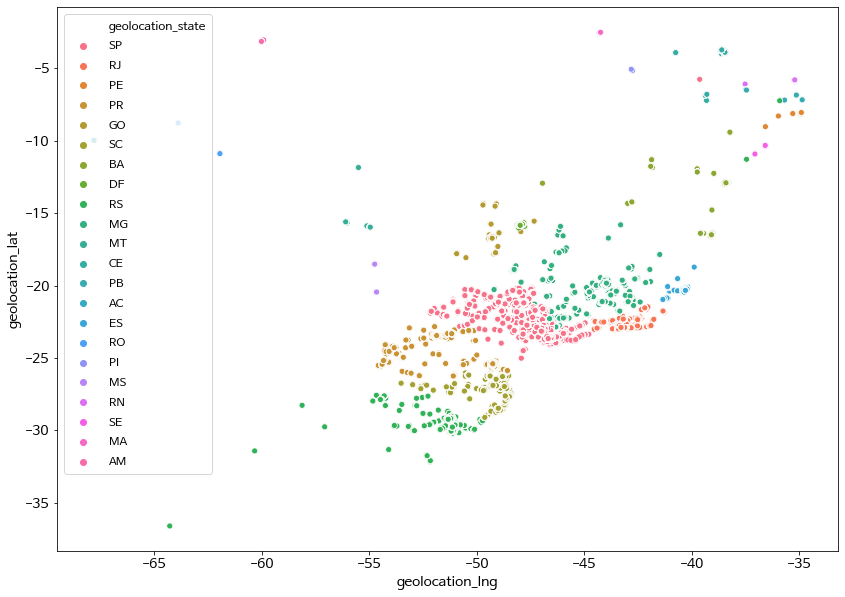

In [193]:
# seller의 state별 산점도

plt.figure(figsize=(14, 10))
ax = sns.scatterplot(data=df_seller_geo, 
                     x='geolocation_lng', 
                     y='geolocation_lat', 
                     hue='geolocation_state')
plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.show()

***
### **지금까지, Olist 이커머스 데이터셋을 살펴보았습니다.**

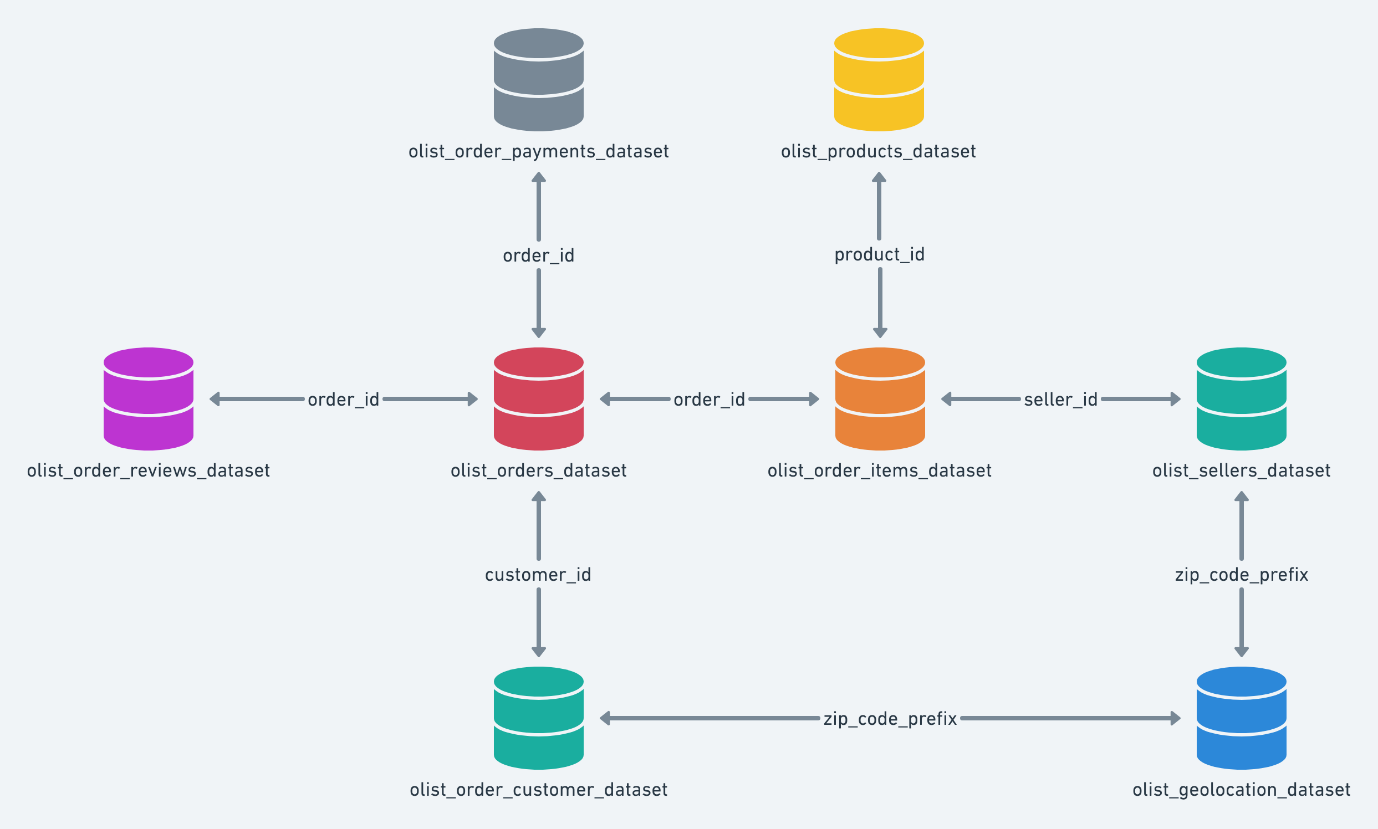

In [194]:
# 생성한 데이터 저장

# df_order_clean.to_csv(dir + 'brazilian-ecommerce/new/olist_orders_dataset_new.csv')

***
### **Wrap up**
- Olist Ecommerce Dataset 확인
- Data Schema 와 Data Description 확인
- 활용할 library 및 Data 로드
- Data 확인 (info/ describe/ dtypes/ columns/ head/ shape 등)
- 결측치 확인 (isnull().sum()/ heatmap/ missingno)
- 결측치 처리 (fillna/ dropna)
- Data 시각화 (barplot/ histogram/ lineplot/ treemap 등)
- outlier 확인 (boxplot/ IQR)
- 사용자정의함수 생성 (def)
- 서로다른 두 테이블 간 결합 (merge)
- 중복 발생 제거 (drop_duplicates)
- 날짜시간 모듈 (strftime/ total_seconds 등)
- 루프를 도는 방법 (for문)
- apply lambda 구문
- 원하는 Data 구조 변환 (transpose/ groupby/ pivot_table/ melt 등)
- 상관분석 (corr/ heatmap)

***
### **참고하면 좋을 자료**
- [Exploratory Data Analysis](http://theta.edu.pl/wp-content/uploads/2012/10/exploratorydataanalysis_tukey.pdf)
- [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)
- [데이터사이언스스쿨](https://datascienceschool.net/view-notebook/aa62265f02fc429aa636ef343c3b1fda/)